In [1]:
## Importing packages

# This R environment comes with all of CRAN and many other helpful packages preinstalled.
# You can see which packages are installed by checking out the kaggle/rstats docker image: 
# https://github.com/kaggle/docker-rstats

library(tidyverse) # metapackage with lots of helpful functions

## Running code

# In a notebook, you can run a single code cell by clicking in the cell and then hitting 
# the blue arrow to the left, or by clicking in the cell and pressing Shift+Enter. In a script, 
# you can run code by highlighting the code you want to run and then clicking the blue arrow
# at the bottom of this window.

## Reading in files

# You can access files from datasets you've added to this kernel in the "../input/" directory.
# You can see the files added to this kernel by running the code below. 

list.files(path = "../input/acp-data")

## Saving data

# If you save any files or images, these will be put in the "output" directory. You 
# can see the output directory by committing and running your kernel (using the 
# Commit & Run button) and then checking out the compiled version of your kernel.

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.3.0.9000     ✔ purrr   0.3.3     
✔ tibble  2.1.3          ✔ dplyr   0.8.4     
✔ tidyr   1.0.2          ✔ stringr 1.4.0     
✔ readr   1.3.1          ✔ forcats 0.4.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



[1] "descriptionid_tokensid.txt"      "purchasedkeywordid_tokensid.txt"
[3] "queryid_tokensid.txt"            "titleid_tokensid.txt"           
[5] "training_subsampled.csv"         "userid_profile.txt"

# 1. Business Objective

## 1.1 Problem Statement

### Premise: 
* Clickthrough rate (CTR) is a ratio showing how often people who see your ad end up clicking it. Clickthrough rate (CTR) can be used to gauge how well your keywords and ads are performing.

* CTR is the number of clicks that your ad receives divided by the number of times your ad is shown: clicks ÷ impressions = CTR. For example, if you had 5 clicks and 100 impressions, then your CTR would be 5%.

* Each of your ads and keywords have their own CTRs that you can see listed in your account.

* A high CTR is a good indication that users find your ads helpful and relevant. CTR also contributes to your keyword's expected CTR, which is a component of Ad Rank. Note that a good CTR is relative to what you're advertising and on which networks.

> Credits: Google (https://support.google.com/adwords/answer/2615875?hl=en) 

* Search advertising is a multi-billion dollar internet industry that has served as one of the most lucrative stories in the domain of machine learning. It has relied extensively on the ability of learned models to predict ad click–through rates (CTR) accurately while promoting authenticity and low latency.

* Many proprietary search engines owned by Google, Microsoft, Yahoo etc., have effectively tackled the economic model underlying the prediction of ad CTR, which works in accordance with cost-per-click (CPC) advertising system where several ads, bidded by advertisers, are selectively picked and ranked by the product of the CPC and CTR (revenue). 
* So the business objective for these companies centralizes on the balance between maximizing profit (and thus the CPC) and user satisfaction (and thus the CTR).

> **The mathematical objective of our project solely revolves around finding pCTR, 
which is the probability that a certain ad is clicked while being conditioned 
on the occurrence of the ad (AdID), user (UserID) and relevant context (P(Click|AdID,UserID,Context)).
Thus, accurately predicting the probability of click (pCTR) of ads is critical for maximizing the revenue 
and improving user satisfaction.****

## 1.2 Constraints

* Interpretability
* Low latency / delay

## 1.3 Dataset source

> https://www.kaggle.com/c/kddcup2012-track2

# 2. Machine Learning Objective

## 2.1 A Glimpse of the Dataset 

### 2.1.1 Schema

<table style="width:50%;text-align:center;">
<caption style="text-align:center;">Data Files</caption>
<tr>
<td><b>Filename</b></td><td><b>Available Format</b></td>
</tr>
<tr>
<td>training</td><td>.txt (9.9Gb)</td>
</tr>
<tr>
<td>queryid_tokensid</td><td>.txt (704Mb)</td>
</tr>
<tr>
<td>purchasedkeywordid_tokensid</td><td>.txt (26Mb)</td>
</tr>
<tr>
<td>titleid_tokensid</td><td>.txt (172Mb)</td>
</tr>
<tr>
<td>descriptionid_tokensid</td><td>.txt (268Mb)</td>
</tr>
<tr>
<td>userid_profile</td><td>.txt (284Mb)</td>
</tr>
</table>

### 2.1.2 Feature description of training.txt (Main)

<table style="width:100%">
  <caption style="text-align:center;">training.txt</caption>
  <tr>
    <th>Feature</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>UserID</td>
    <td>The unique id for each user</td>
    </tr>
  <tr>
    <td>AdID</td>
    <td>The unique id for each ad</td>
  </tr>
  <tr>
    <td>QueryID</td>
    <td>The unique id for each Query (it is a primary key in Query table(queryid_tokensid.txt))</td>
  </tr>
  <tr>
    <td>Depth</td>
    <td>The number of ads impressed in a session is known as the 'depth'. </td>
  </tr>
  <tr>
    <td>Position</td>
    <td>The order of an ad in the impression list is known as the ‘position’ of that ad.</td>
  </tr>
  <tr>
    <td>Impression</td>
    <td>The number of search sessions in which the ad (AdID) was impressed by the user (UserID) who issued the query (Query).</td>
  </tr>
  <tr>
    <td>Click</td>
    <td>The number of times, among the above impressions, the user (UserID) clicked the ad (AdID).</td>
  </tr>
  <tr>
    <td>TitleId</td>
    <td>A property of ads. This is the key of 'titleid_tokensid.txt'. [An Ad, when impressed, would be displayed as a short text known as ’title’, followed by a slightly longer text known as the ’description’, and a URL (usually shortened to save screen space) known as ’display URL’.]</td>
  </tr>
  <tr>
    <td>DescId</td>
    <td>A property of ads.  This is the key of 'descriptionid_tokensid.txt'. [An Ad, when impressed, would be displayed as a short text known as ’title’, followed by a slightly longer text known as the ’description’, and a URL (usually shortened to save screen space) known as ’display URL’.]</td>
  </tr>
  <tr>
    <td>AdURL</td>
    <td>The URL is shown together with the title and description of an ad. It is usually the shortened landing page URL of the ad, but not always. In the data file,  this URL is hashed for anonymity.</td>
  </tr>
  <tr>
    <td>KeyId</td>
    <td>A property of ads. This is the key of  'purchasedkeyword_tokensid.txt'.</td>
  </tr>
  <tr>
    <td>AdvId</td>
    <td>a property of the ad. Some advertisers consistently optimize their ads, so the title and description of their ads are more attractive than those of others’ ads.</td>
  </tr>
</table>

___
There are five additional data files, as mentioned in the above section: 

1. queryid_tokensid.txt 

2. purchasedkeywordid_tokensid.txt 

3. titleid_tokensid.txt 

4. descriptionid_tokensid.txt 

5. userid_profile.txt 

Each line of the first four files maps an id to a list of tokens, corresponding to the query, keyword, ad title, and ad description, respectively. In each line, a TAB character separates the id and the token set.  A token can basically be a word in a natural language. For anonymity, each token is represented by its hash value.  Tokens are delimited by the character ‘|’. 

Each line of ‘userid_profile.txt’ is composed of UserID, Gender, and Age, delimited by the TAB character. Note that not every UserID in the training and the testing set will be present in ‘userid_profile.txt’. Each field is described below: 

1. Gender:  '1'  for male, '2' for female,  and '0'  for unknown. 

2. Age: '1'  for (0, 12],  '2' for (12, 18], '3' for (18, 24], '4'  for  (24, 30], '5' for (30,  40], and '6' for greater than 40. 

### 2.1.3 Examining an instance of the data
__ training_subsampled.csv __ (Subsampled version - 5M rows of training.txt)
<pre>
Click Impression     AdURL	                AdId	   AdvId   Depth      Pos	  QId	   KeyId	TitleId	 DescId	  UId
0	      1	     4298118681424644510	  7686695	 385	   3	    3	  1601	   5521	   7709	   576	   490234
0	      1	     4860571499428580850      21560664	37484	 2	    2	  2255103	317	    48989	  44771	 490234
0	      1	     9704320783495875564	  21748480	36759     3	    3	  4532751	60721	  685038	 29681	 490234
</pre>

__ queryid_tokensid.txt__
<pre>
QId	Query
0	12731
1	1545|75|31
2	383
3	518|1996
4	4189|75|31
</pre>

__purchasedkeywordid_tokensid.txt__
<pre>
KId Keyword
0	12731
1	1545
2	477
3	1545|75|31
4	279
</pre>

__titleid_tokensid.txt__
<pre>
TitleId	Title
0	615|1545|75|31|1|138|1270|615|131
1	466|582|685|1|42|45|477|314
2	12731|190|513|12731|677|183
3	2371|3970|1|2805|4340|3|2914|10640|3688|11|834|3
4	165|134|460|2887|50|2|17527|1|1540|592|2181|3|...
</pre>

__descriptionid_tokensid.txt__
<pre>
DescId	Description
0	1545|31|40|615|1|272|18889|1|220|511|20|5270|1...
1	172|46|467|170|5634|5112|40|155|1965|834|21|41...
2	2672|6|1159|109662|123|49933|160|848|248|207|1...
3	13280|35|1299|26|282|477|606|1|4016|1671|771|1...
4	13327|99|128|494|2928|21|26500|10|11733|10|318
</pre>

__userid_profile.txt__
<pre>
UId	Gender   Age
 1	  1	    5
 2	  2	    3
 3	  1	    5
 4	  1	    3
 5	  2	    1
</pre>

## 2.2 Mapping business objective to Machine learning problem

### 2.2.1 What is the primary objective of this ML problem?

### 2.2.2 What constraints / bias we need to address?

### 2.2.3 Key Performance Indicator / Performance Evaluation Metrics 

### 2.2.4 What type of Machine Learning problem can our problem statement be posed as?

# 3. Exploratory Data Analysis


## 3.1 Importing the data

### 3.1.1 Read training_subsampled.csv (Main data)

In [2]:
main = read_csv("../input/acp-data/training_subsampled.csv")

Parsed with column specification:
cols(
  Click = col_double(),
  Impression = col_double(),
  AdURL = col_double(),
  AdId = col_double(),
  AdvId = col_double(),
  Depth = col_double(),
  Pos = col_double(),
  QId = col_double(),
  KeyId = col_double(),
  TitleId = col_double(),
  DescId = col_double(),
  UId = col_double()
)



In [3]:
main %>% head

Click,Impression,AdURL,AdId,AdvId,Depth,Pos,QId,KeyId,TitleId,DescId,UId
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,1,4.298119e+18,7686695,385,3,3,1601,5521,7709,576,490234
0,1,4.860571e+18,21560664,37484,2,2,2255103,317,48989,44771,490234
0,1,9.704321e+18,21748480,36759,3,3,4532751,60721,685038,29681,490234
0,1,1.367763e+19,3517124,23778,3,1,1601,2155,1207,1422,490234
0,1,3.284760e+18,20758093,34535,1,1,4532751,77819,266618,222223,490234
0,1,1.019639e+19,21375650,36832,2,1,4688625,202465,457316,429545,490234


### 3.1.2 Read Query data

In [4]:
query.colnames  = c('QId', 'Query')
queries = read_delim("../input/acp-data/queryid_tokensid.txt", delim = "\t", col_names = query.colnames, col_types = cols(Query = col_character()))

In [5]:
queries %>% head

QId,Query
<dbl>,<chr>
0,12731
1,1545|75|31
2,383
3,518|1996
4,4189|75|31
5,1545


### 3.1.3 Read User data

In [6]:
user.colnames  = c('UId', 'Gender', 'Age')
users = read_delim("../input/acp-data/userid_profile.txt", delim = "\t", col_names = user.colnames)

Parsed with column specification:
cols(
  UId = col_double(),
  Gender = col_double(),
  Age = col_double()
)



In [7]:
users %>% head

UId,Gender,Age
<dbl>,<dbl>,<dbl>
1,1,5
2,2,3
3,1,5
4,1,3
5,2,1
6,2,3


### 3.1.4 Read Ad Title data

In [8]:
adtitle.colnames  = c('TitleId', 'Title')
ad.titles = read_delim("../input/acp-data/titleid_tokensid.txt", delim = "\t", col_names = adtitle.colnames, col_types = cols(Title = col_character()))

In [9]:
ad.titles %>% head

TitleId,Title
<dbl>,<chr>
0,615|1545|75|31|1|138|1270|615|131
1,466|582|685|1|42|45|477|314
2,12731|190|513|12731|677|183
3,2371|3970|1|2805|4340|3|2914|10640|3688|11|834|3
4,165|134|460|2887|50|2|17527|1|1540|592|2181|3|373|5263|11036|3
5,2389|6|0|203|616|0|1215|409|3


### 3.1.5 Read Ad Description data

In [10]:
addesc.colnames  = c('DescId', 'Description')
ad.desc = read_delim("../input/acp-data/descriptionid_tokensid.txt", delim = "\t", col_names = addesc.colnames, col_types = cols(Description = col_character()))

In [11]:
ad.desc %>% head

DescId,Description
<dbl>,<chr>
0,1545|31|40|615|1|272|18889|1|220|511|20|5270|1|976|4063|189|1|103|644|58
1,172|46|467|170|5634|5112|40|155|1965|834|21|4133|2233|3922|11082|603|1|1984|9559|3|10455|412|155|3|577|3084|391|3
2,2672|6|1159|109662|123|49933|160|848|248|207|1|19|11002|3008|54|2|875|94|1|349|6896
3,13280|35|1299|26|282|477|606|1|4016|1671|771|1|86|102|144|591|26|486|329|26|1328|192|55|536|58
4,13327|99|128|494|2928|21|26500|10|11733|10|3181|1021|10|12731|27|21|25072
5,12731|390|1354|1|4383|234|26|205|734|26|17|893|1|57|21|47264|17107|1468


### 3.1.6 Read Purchased Keyword token data

In [12]:
keywd.colnames  = c('KeywordId', 'Keyword')
keywords = read_delim("../input/acp-data/purchasedkeywordid_tokensid.txt", delim = "\t", col_names = keywd.colnames, col_types = cols(Keyword = col_character()))

In [13]:
keywords %>% head

KeywordId,Keyword
<dbl>,<chr>
0,12731
1,1545
2,477
3,1545|75|31
4,279
5,2684


## 3.2 Preprocessing the data

### 3.2.1 Merge the datasets

In [14]:
acp_data <- main %>% 
merge(users, by = "UId") %>%
merge(queries, by = "QId") %>%
merge(ad.titles, by = "TitleId") %>%
merge(ad.desc, by = "DescId") %>%
merge(keywords, by.x = "KeyId", by.y = "KeywordId")
acp_data %>% head

,KeyId,DescId,TitleId,QId,UId,Click,Impression,AdURL,AdId,AdvId,Depth,Pos,Gender,Age,Query,Title,Description,Keyword
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,0,14,7,0,3931361,0,1,1.205788e+19,20157587,27961,3,3,1,3,12731,51|0|12731|8|183|94,36|12731|37|51|1|173|32|26|214|154|26|234|188|3,12731
2,0,60,49,0,4769249,0,1,1.205788e+19,20157628,27961,3,3,1,3,12731,12731|1354|1|334|34|51,51|277|198|2|12731|421|128|1224|1|1354|2121|1|139|525|1|930|28|1435|3,12731
3,0,4,25,0,9390714,0,1,1.034947e+19,21522776,37422,3,1,1,5,12731,183|390|18567|17|146|1|29|1897,13327|99|128|494|2928|21|26500|10|11733|10|3181|1021|10|12731|27|21|25072,12731
4,0,4,12,0,5294340,0,1,1.034947e+19,21522776,37422,3,1,1,2,12731,190|513|1|205|187|54|454|2211|3934|1189,13327|99|128|494|2928|21|26500|10|11733|10|3181|1021|10|12731|27|21|25072,12731
5,0,4,12,0,10479860,0,1,1.034947e+19,21522776,37422,3,1,1,4,12731,190|513|1|205|187|54|454|2211|3934|1189,13327|99|128|494|2928|21|26500|10|11733|10|3181|1021|10|12731|27|21|25072,12731
6,0,28,26,0,7203474,0,1,1.034947e+19,21522776,37422,2,2,1,3,12731,183|8883|13200|10|205|187|10|1580|128,494|7049|6134|32896|135|7858|141|1|12731|27|21|25072,12731


### 3.2.2 Engineer the response variable CTR (Click-Through Rate)

In [15]:
acp_data <- transform(acp_data, CTR = (Click/Impression * 100))
acp_data %>% head

,KeyId,DescId,TitleId,QId,UId,Click,Impression,AdURL,AdId,AdvId,Depth,Pos,Gender,Age,Query,Title,Description,Keyword,CTR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,0,14,7,0,3931361,0,1,1.205788e+19,20157587,27961,3,3,1,3,12731,51|0|12731|8|183|94,36|12731|37|51|1|173|32|26|214|154|26|234|188|3,12731,0
2,0,60,49,0,4769249,0,1,1.205788e+19,20157628,27961,3,3,1,3,12731,12731|1354|1|334|34|51,51|277|198|2|12731|421|128|1224|1|1354|2121|1|139|525|1|930|28|1435|3,12731,0
3,0,4,25,0,9390714,0,1,1.034947e+19,21522776,37422,3,1,1,5,12731,183|390|18567|17|146|1|29|1897,13327|99|128|494|2928|21|26500|10|11733|10|3181|1021|10|12731|27|21|25072,12731,0
4,0,4,12,0,5294340,0,1,1.034947e+19,21522776,37422,3,1,1,2,12731,190|513|1|205|187|54|454|2211|3934|1189,13327|99|128|494|2928|21|26500|10|11733|10|3181|1021|10|12731|27|21|25072,12731,0
5,0,4,12,0,10479860,0,1,1.034947e+19,21522776,37422,3,1,1,4,12731,190|513|1|205|187|54|454|2211|3934|1189,13327|99|128|494|2928|21|26500|10|11733|10|3181|1021|10|12731|27|21|25072,12731,0
6,0,28,26,0,7203474,0,1,1.034947e+19,21522776,37422,2,2,1,3,12731,183|8883|13200|10|205|187|10|1580|128,494|7049|6134|32896|135|7858|141|1|12731|27|21|25072,12731,0


### 3.2.3 Engineer a new feature to capture the count of words in Ad Title, Description, query and keyword.

In [16]:
findCount <- function(x) {
          length(unlist(strsplit(x, "|", fixed = TRUE)))
        }

In [17]:
# Count the number of words in a query issued by a user.
acp_data$Qcount <- sapply(acp_data$Query, findCount)
acp_data %>% head

,KeyId,DescId,TitleId,QId,UId,Click,Impression,AdURL,AdId,AdvId,Depth,Pos,Gender,Age,Query,Title,Description,Keyword,CTR,Qcount
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>
1,0,14,7,0,3931361,0,1,1.205788e+19,20157587,27961,3,3,1,3,12731,51|0|12731|8|183|94,36|12731|37|51|1|173|32|26|214|154|26|234|188|3,12731,0,1
2,0,60,49,0,4769249,0,1,1.205788e+19,20157628,27961,3,3,1,3,12731,12731|1354|1|334|34|51,51|277|198|2|12731|421|128|1224|1|1354|2121|1|139|525|1|930|28|1435|3,12731,0,1
3,0,4,25,0,9390714,0,1,1.034947e+19,21522776,37422,3,1,1,5,12731,183|390|18567|17|146|1|29|1897,13327|99|128|494|2928|21|26500|10|11733|10|3181|1021|10|12731|27|21|25072,12731,0,1
4,0,4,12,0,5294340,0,1,1.034947e+19,21522776,37422,3,1,1,2,12731,190|513|1|205|187|54|454|2211|3934|1189,13327|99|128|494|2928|21|26500|10|11733|10|3181|1021|10|12731|27|21|25072,12731,0,1
5,0,4,12,0,10479860,0,1,1.034947e+19,21522776,37422,3,1,1,4,12731,190|513|1|205|187|54|454|2211|3934|1189,13327|99|128|494|2928|21|26500|10|11733|10|3181|1021|10|12731|27|21|25072,12731,0,1
6,0,28,26,0,7203474,0,1,1.034947e+19,21522776,37422,2,2,1,3,12731,183|8883|13200|10|205|187|10|1580|128,494|7049|6134|32896|135|7858|141|1|12731|27|21|25072,12731,0,1


In [18]:
# Count the number of words in an Ad title of a specific Ad.
acp_data$Tcount <- sapply(acp_data$Title, findCount)
acp_data %>% head

,KeyId,DescId,TitleId,QId,UId,Click,Impression,AdURL,AdId,AdvId,⋯,Pos,Gender,Age,Query,Title,Description,Keyword,CTR,Qcount,Tcount
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>
1,0,14,7,0,3931361,0,1,1.205788e+19,20157587,27961,⋯,3,1,3,12731,51|0|12731|8|183|94,36|12731|37|51|1|173|32|26|214|154|26|234|188|3,12731,0,1,6
2,0,60,49,0,4769249,0,1,1.205788e+19,20157628,27961,⋯,3,1,3,12731,12731|1354|1|334|34|51,51|277|198|2|12731|421|128|1224|1|1354|2121|1|139|525|1|930|28|1435|3,12731,0,1,6
3,0,4,25,0,9390714,0,1,1.034947e+19,21522776,37422,⋯,1,1,5,12731,183|390|18567|17|146|1|29|1897,13327|99|128|494|2928|21|26500|10|11733|10|3181|1021|10|12731|27|21|25072,12731,0,1,8
4,0,4,12,0,5294340,0,1,1.034947e+19,21522776,37422,⋯,1,1,2,12731,190|513|1|205|187|54|454|2211|3934|1189,13327|99|128|494|2928|21|26500|10|11733|10|3181|1021|10|12731|27|21|25072,12731,0,1,10
5,0,4,12,0,10479860,0,1,1.034947e+19,21522776,37422,⋯,1,1,4,12731,190|513|1|205|187|54|454|2211|3934|1189,13327|99|128|494|2928|21|26500|10|11733|10|3181|1021|10|12731|27|21|25072,12731,0,1,10
6,0,28,26,0,7203474,0,1,1.034947e+19,21522776,37422,⋯,2,1,3,12731,183|8883|13200|10|205|187|10|1580|128,494|7049|6134|32896|135|7858|141|1|12731|27|21|25072,12731,0,1,9


In [19]:
# Count the number of words in an Ad Description of a specific Ad.
acp_data$Dcount <- sapply(acp_data$Description, findCount)
acp_data %>% head

,KeyId,DescId,TitleId,QId,UId,Click,Impression,AdURL,AdId,AdvId,⋯,Gender,Age,Query,Title,Description,Keyword,CTR,Qcount,Tcount,Dcount
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<int>
1,0,14,7,0,3931361,0,1,1.205788e+19,20157587,27961,⋯,1,3,12731,51|0|12731|8|183|94,36|12731|37|51|1|173|32|26|214|154|26|234|188|3,12731,0,1,6,14
2,0,60,49,0,4769249,0,1,1.205788e+19,20157628,27961,⋯,1,3,12731,12731|1354|1|334|34|51,51|277|198|2|12731|421|128|1224|1|1354|2121|1|139|525|1|930|28|1435|3,12731,0,1,6,19
3,0,4,25,0,9390714,0,1,1.034947e+19,21522776,37422,⋯,1,5,12731,183|390|18567|17|146|1|29|1897,13327|99|128|494|2928|21|26500|10|11733|10|3181|1021|10|12731|27|21|25072,12731,0,1,8,17
4,0,4,12,0,5294340,0,1,1.034947e+19,21522776,37422,⋯,1,2,12731,190|513|1|205|187|54|454|2211|3934|1189,13327|99|128|494|2928|21|26500|10|11733|10|3181|1021|10|12731|27|21|25072,12731,0,1,10,17
5,0,4,12,0,10479860,0,1,1.034947e+19,21522776,37422,⋯,1,4,12731,190|513|1|205|187|54|454|2211|3934|1189,13327|99|128|494|2928|21|26500|10|11733|10|3181|1021|10|12731|27|21|25072,12731,0,1,10,17
6,0,28,26,0,7203474,0,1,1.034947e+19,21522776,37422,⋯,1,3,12731,183|8883|13200|10|205|187|10|1580|128,494|7049|6134|32896|135|7858|141|1|12731|27|21|25072,12731,0,1,9,12


In [20]:
# Count the number of words in the keyword of a specific Ad.
acp_data$Kcount <- sapply(acp_data$Keyword, findCount)
acp_data %>% head

,KeyId,DescId,TitleId,QId,UId,Click,Impression,AdURL,AdId,AdvId,⋯,Age,Query,Title,Description,Keyword,CTR,Qcount,Tcount,Dcount,Kcount
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>
1,0,14,7,0,3931361,0,1,1.205788e+19,20157587,27961,⋯,3,12731,51|0|12731|8|183|94,36|12731|37|51|1|173|32|26|214|154|26|234|188|3,12731,0,1,6,14,1
2,0,60,49,0,4769249,0,1,1.205788e+19,20157628,27961,⋯,3,12731,12731|1354|1|334|34|51,51|277|198|2|12731|421|128|1224|1|1354|2121|1|139|525|1|930|28|1435|3,12731,0,1,6,19,1
3,0,4,25,0,9390714,0,1,1.034947e+19,21522776,37422,⋯,5,12731,183|390|18567|17|146|1|29|1897,13327|99|128|494|2928|21|26500|10|11733|10|3181|1021|10|12731|27|21|25072,12731,0,1,8,17,1
4,0,4,12,0,5294340,0,1,1.034947e+19,21522776,37422,⋯,2,12731,190|513|1|205|187|54|454|2211|3934|1189,13327|99|128|494|2928|21|26500|10|11733|10|3181|1021|10|12731|27|21|25072,12731,0,1,10,17,1
5,0,4,12,0,10479860,0,1,1.034947e+19,21522776,37422,⋯,4,12731,190|513|1|205|187|54|454|2211|3934|1189,13327|99|128|494|2928|21|26500|10|11733|10|3181|1021|10|12731|27|21|25072,12731,0,1,10,17,1
6,0,28,26,0,7203474,0,1,1.034947e+19,21522776,37422,⋯,3,12731,183|8883|13200|10|205|187|10|1580|128,494|7049|6134|32896|135|7858|141|1|12731|27|21|25072,12731,0,1,9,12,1


## 3.3 Feature Analysis

### 3.3.1 Features and their data types

In [21]:
str(acp_data)

'data.frame':	4952274 obs. of  23 variables:
 $ KeyId      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ DescId     : num  14 60 4 4 4 28 4 5 4 5 ...
 $ TitleId    : num  7 49 25 12 12 26 12 2 12 2 ...
 $ QId        : num  0 0 0 0 0 0 0 0 0 0 ...
 $ UId        : num  3931361 4769249 9390714 5294340 10479860 ...
 $ Click      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Impression : num  1 1 1 1 1 1 2 2 1 2 ...
 $ AdURL      : num  1.21e+19 1.21e+19 1.03e+19 1.03e+19 1.03e+19 ...
 $ AdId       : num  20157587 20157628 21522776 21522776 21522776 ...
 $ AdvId      : num  27961 27961 37422 37422 37422 ...
 $ Depth      : num  3 3 3 3 3 2 2 3 3 3 ...
 $ Pos        : num  3 3 1 1 1 2 1 2 1 2 ...
 $ Gender     : num  1 1 1 1 1 1 1 2 1 1 ...
 $ Age        : num  3 3 5 2 4 3 6 4 3 3 ...
 $ Query      : chr  "12731" "12731" "12731" "12731" ...
 $ Title      : chr  "51|0|12731|8|183|94" "12731|1354|1|334|34|51" "183|390|18567|17|146|1|29|1897" "190|513|1|205|187|54|454|2211|3934|1189" ...
 $ Description: chr  "36|12731

### 3.3.2 Testing the waters

In [22]:
# Shape of the data...
dim(acp_data)

[1] 4952274      23

In [23]:
# Total number of unique queries in the data
acp_data$QId %>%
unique %>%
length

[1] 1155690

In [24]:
# Total number of unique users in the data
acp_data$UId %>%
unique %>%
length

[1] 971492

In [25]:
# Total number of unique Ads in the data
acp_data$AdId %>%
unique %>%
length

[1] 212422

In [26]:
# Total number of unique advertisers in the data
acp_data$AdvId %>%
unique %>%
length

[1] 13921

In [27]:
# CTR(Ad) = #Clicks(Ad)/#Impressions(Ad)
# We calculate the Net CTR of the entire data as a percentage
impressions.total <- sum(acp_data$Impression)
clicks.total <- sum(acp_data$Click)
CTR.net <- clicks.total / impressions.total * 100
cat(CTR.net, "%")

4.19677 %

### 3.3.3 Descriptive statistics of the data

In [28]:
summary(acp_data)

     KeyId             DescId           TitleId             QId          
 Min.   :      0   Min.   :      0   Min.   :      0   Min.   :       0  
 1st Qu.:    218   1st Qu.:    211   1st Qu.:    337   1st Qu.:     759  
 Median :   2248   Median :   2886   Median :   6064   Median :   31666  
 Mean   :  27740   Mean   :  82916   Mean   : 128592   Mean   : 2754789  
 3rd Qu.:  15220   3rd Qu.:  33077   3rd Qu.:  62378   3rd Qu.: 1893135  
 Max.   :1249715   Max.   :3171796   Max.   :4051382   Max.   :26243530  
      UId               Click            Impression           AdURL          
 Min.   :      21   Min.   : 0.00000   Min.   :   1.000   Min.   :4.824e+14  
 1st Qu.:  403545   1st Qu.: 0.00000   1st Qu.:   1.000   1st Qu.:5.511e+18  
 Median : 2163190   Median : 0.00000   Median :   1.000   Median :1.057e+19  
 Mean   : 4692199   Mean   : 0.05106   Mean   :   1.217   Mean   :9.733e+18  
 3rd Qu.: 7133111   3rd Qu.: 0.00000   3rd Qu.:   1.000   3rd Qu.:1.434e+19  
 Max.   :23146

## 3.4 Univariate Analysis

### 3.4.1 Study the distribution of the count of words in Search query

In [29]:
temp <- acp_data %>% select(Qcount)

cat("Minimum Length of a Query: ", min(temp$Qcount), "\n")
cat("Maximum Length of a Query: ", max(temp$Qcount), "\n")
cat('Mean word count in a Search query:', mean(temp$Qcount), "\n")
cat('Median word count in a Search query:', quantile(temp$Qcount,  probs = c(0.5)), "\n")
cat('3rd Quantile of word count in a Search query:', quantile(temp$Qcount,  probs = c(0.75)), "\n")
cat('95 percentile of the word count in a Search query:', quantile(temp$Qcount,  probs = c(0.95)), "\n")

Minimum Length of a Query:  1 
Maximum Length of a Query:  127 
Mean word count in a Search query: 2.988554 
Median word count in a Search query: 3 
3rd Quantile of word count in a Search query: 4 
95 percentile of the word count in a Search query: 6 


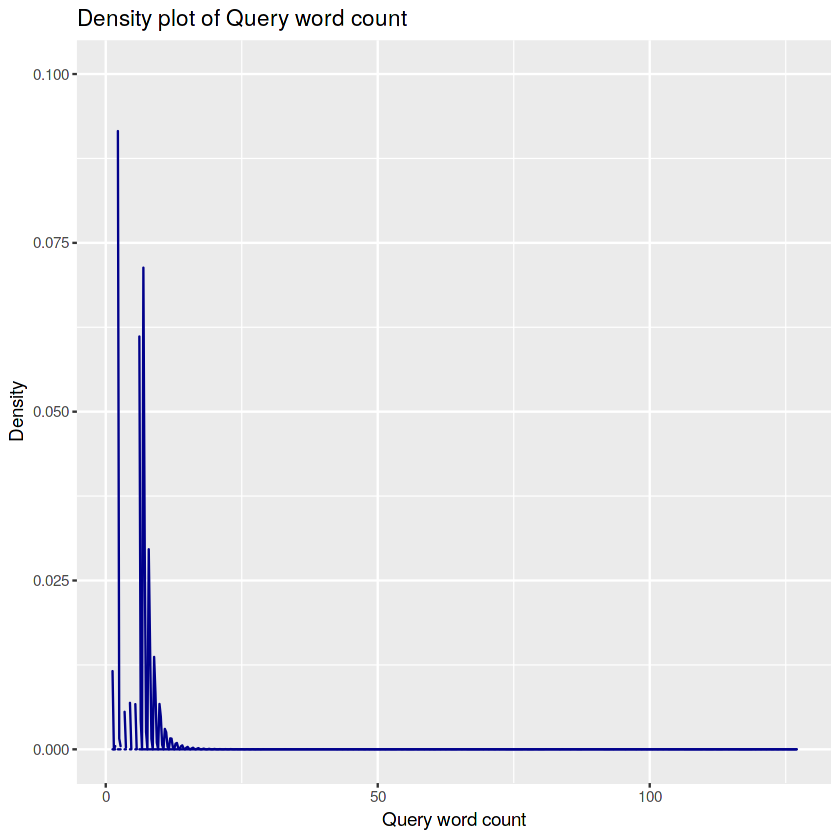

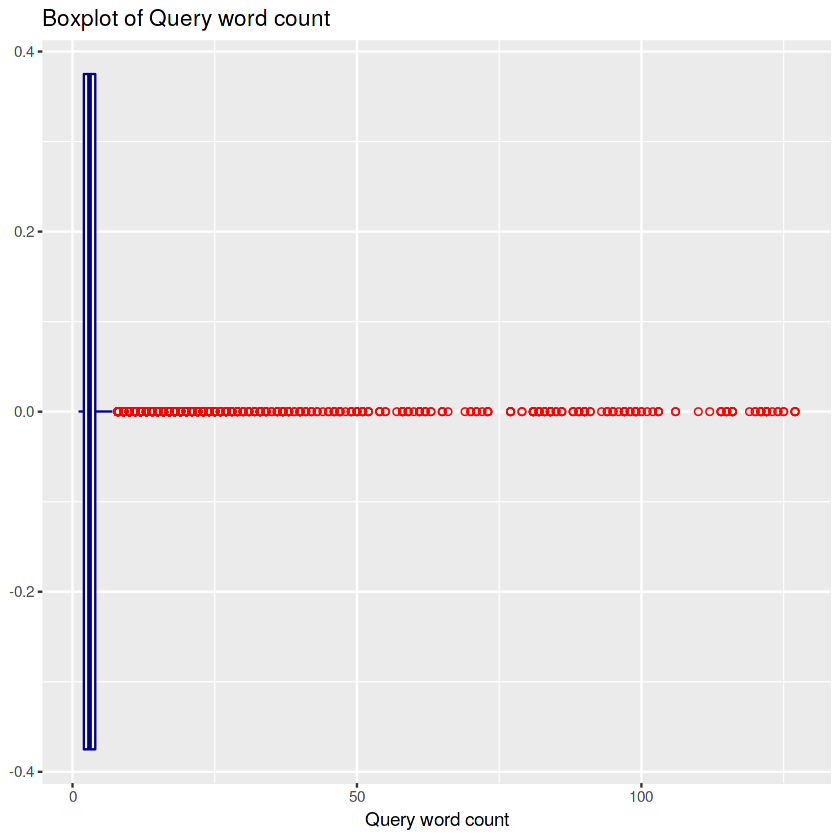

In [30]:
# Plot the distribution
ggplot(temp, aes(x=Qcount)) + geom_density(color="darkblue") + scale_y_continuous(name="Density", limits=c(0, 0.1)) + labs(x = "Query word count", title = "Density plot of Query word count")
ggplot(temp, aes(x=Qcount)) + geom_boxplot(color="darkblue",outlier.colour = "red", outlier.shape = 1) + scale_x_continuous(name="Query word count") + labs(title = "Boxplot of Query word count")

> Clearly, we observe that the data contains outliers. We now proceed to remove them in order to make our analysis more robust.

In [31]:
# We remove outliers by considering only queries with length < 10.0 (chosen randomly)
temp <- temp %>% filter(Qcount < 10)
cat("Minimum Length of a Query: ", min(temp$Qcount), "\n")
cat("Maximum Length of a Query: ", max(temp$Qcount), "\n")
cat('Mean word count in a Search query:', mean(temp$Qcount), "\n")
cat('Median word count in a Search query:', quantile(temp$Qcount,  probs = c(0.5)), "\n")
cat('3rd Quantile of word count in a Search query:', quantile(temp$Qcount,  probs = c(0.75)), "\n")
cat('95 percentile of the word count in a Search query:', quantile(temp$Qcount,  probs = c(0.95)), "\n")

Minimum Length of a Query:  1 
Maximum Length of a Query:  9 
Mean word count in a Search query: 2.949819 
Median word count in a Search query: 3 
3rd Quantile of word count in a Search query: 4 
95 percentile of the word count in a Search query: 6 


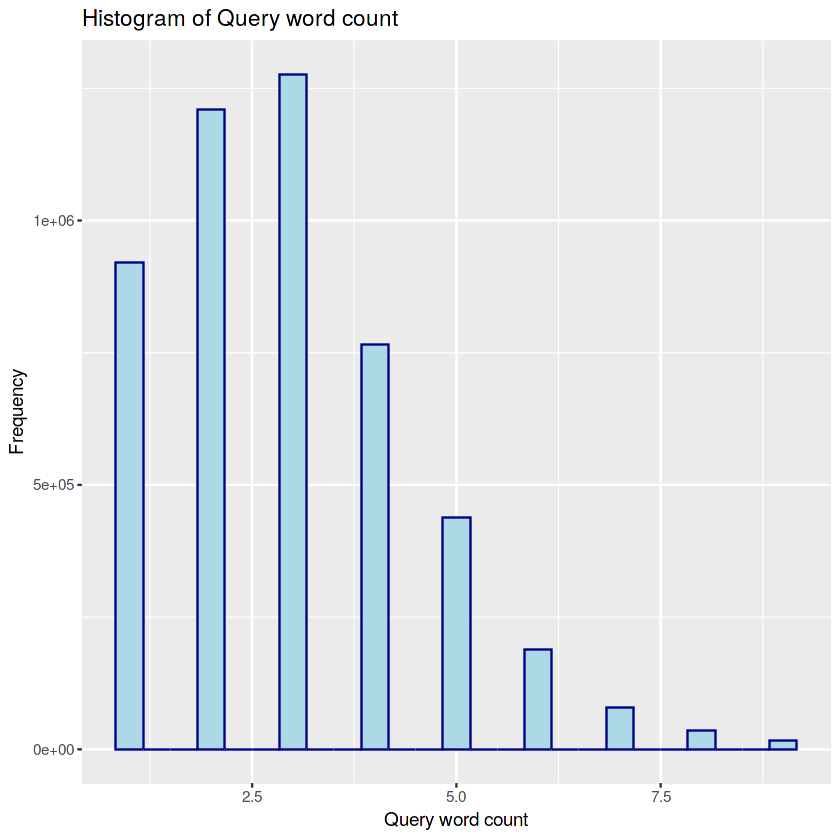

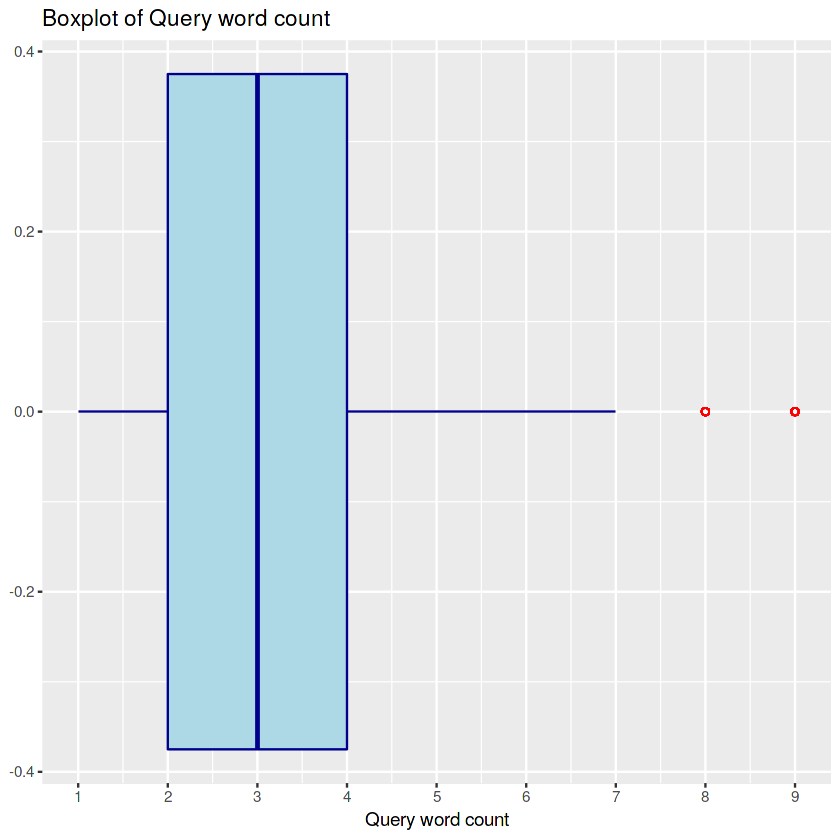

In [32]:
# Plot the distribution
ggplot(temp, aes(x=Qcount)) + geom_histogram(color="darkblue", fill = "lightblue", bins = 25) + labs(x = "Query word count", y = "Frequency", title = "Histogram of Query word count")
ggplot(temp, aes(x=Qcount)) +  geom_boxplot(color="darkblue", fill = "lightblue", outlier.colour = "red", outlier.shape = 1) + scale_x_continuous(breaks = seq(0, 10,by = 1)) + labs(x = "Query word count", title = "Boxplot of Query word count")

> Conclusion: We observe that 75% of search queries have less than 4 words.

### 3.4.2 Study the distribution of the count of words in Ad title

In [33]:
temp <- acp_data %>% select(Tcount)

cat("Minimum Length of a Query: ", min(temp$Tcount), "\n")
cat("Maximum Length of a Query: ", max(temp$Tcount), "\n")
cat('Mean word count in a Search query:', mean(temp$Tcount), "\n")
cat('Median word count in a Search query:', quantile(temp$Tcount,  probs = c(0.5)), "\n")
cat('3rd Quantile of word count in a Search query:', quantile(temp$Tcount,  probs = c(0.75)), "\n")
cat('95 percentile of the word count in a Search query:', quantile(temp$Tcount,  probs = c(0.95)), "\n")

Minimum Length of a Query:  1 
Maximum Length of a Query:  32 
Mean word count in a Search query: 8.765299 
Median word count in a Search query: 9 
3rd Quantile of word count in a Search query: 11 
95 percentile of the word count in a Search query: 14 


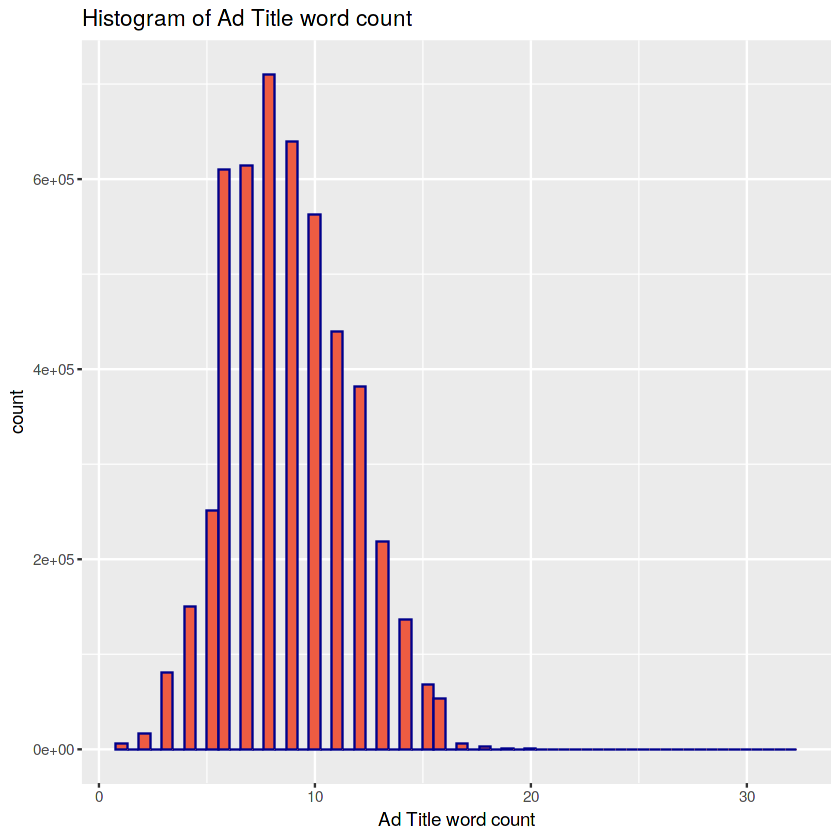

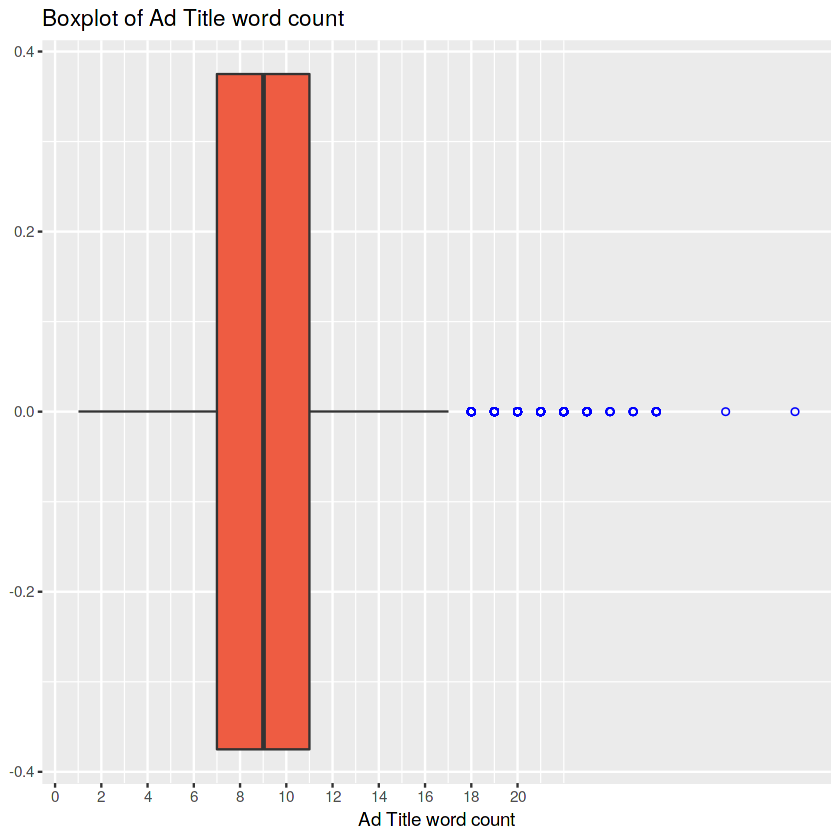

In [34]:
# Plot the distribution
ggplot(temp, aes(x=Tcount)) + geom_histogram(color="darkblue", fill = "tomato2", bins = 60) + labs(x = "Ad Title word count", title = "Histogram of Ad Title word count")
ggplot(temp, aes(x=Tcount)) + geom_boxplot(fill="tomato2",outlier.colour = "blue", outlier.shape = 1) + scale_x_continuous(name="Ad Title word count",breaks = seq(0, 20, by = 2)) + labs(title = "Boxplot of Ad Title word count")

> Conclusion: We observe that 75% of Ad titles have less than 11 words.

### 3.4.3 Study the distribution of the count of words in Ad description

In [35]:
temp <- acp_data %>% select(Dcount)

cat("Minimum Length of a Query: ", min(temp$Dcount), "\n")
cat("Maximum Length of a Query: ", max(temp$Dcount), "\n")
cat('Mean word count in a Search query:', mean(temp$Dcount), "\n")
cat('Median word count in a Search query:', quantile(temp$Dcount,  probs = c(0.5)), "\n")
cat('3rd Quantile of word count in a Search query:', quantile(temp$Dcount,  probs = c(0.75)), "\n")
cat('95 percentile of the word count in a Search query:', quantile(temp$Dcount,  probs = c(0.95)), "\n")

Minimum Length of a Query:  1 
Maximum Length of a Query:  47 
Mean word count in a Search query: 21.31186 
Median word count in a Search query: 22 
3rd Quantile of word count in a Search query: 25 
95 percentile of the word count in a Search query: 28 


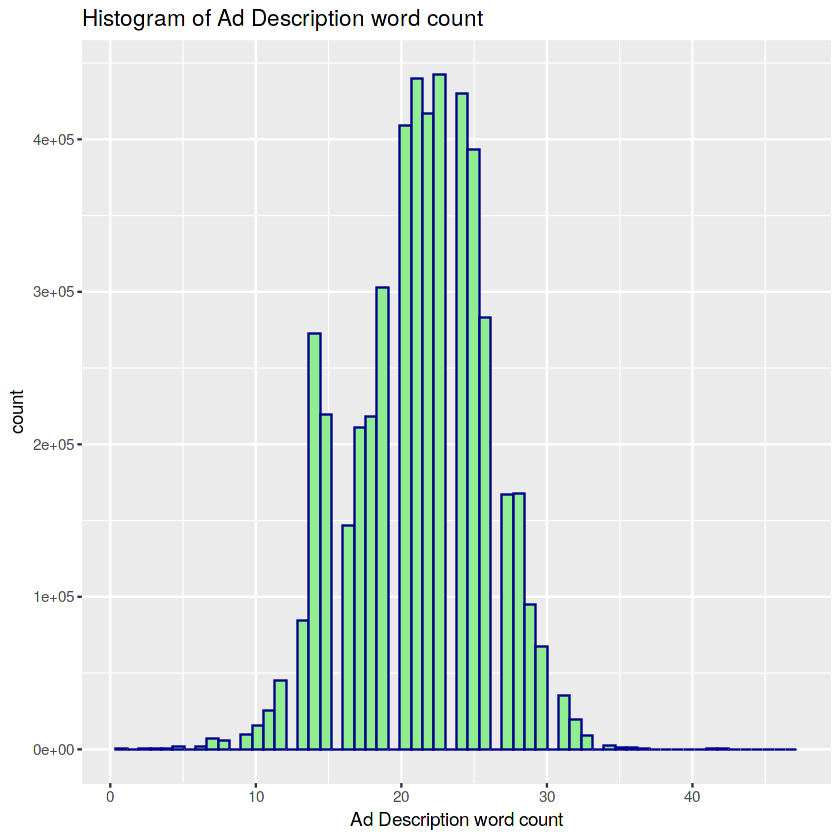

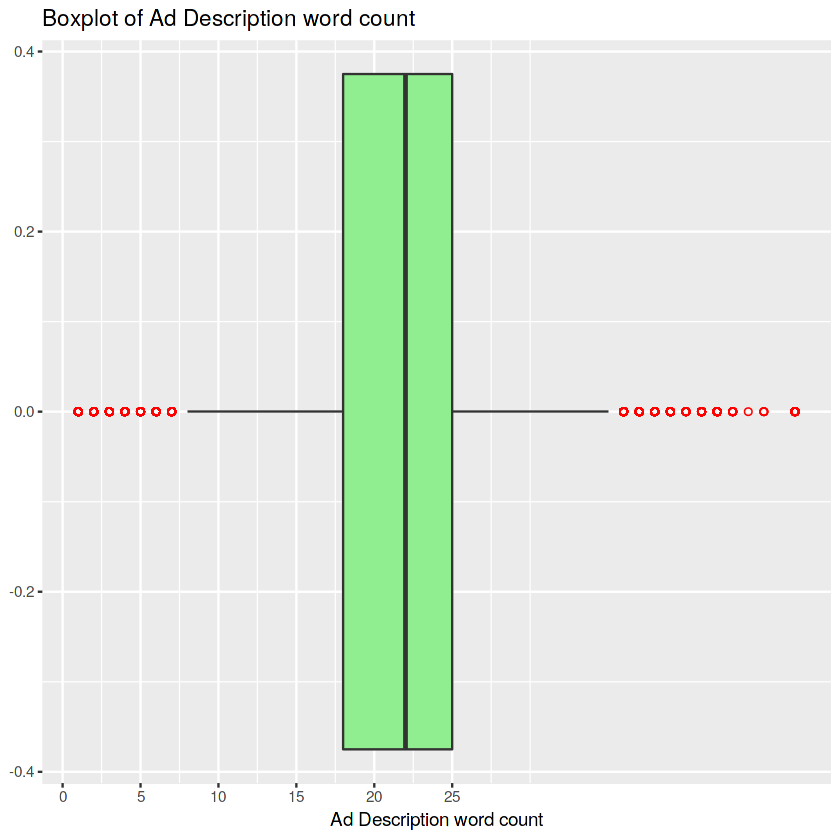

In [36]:
# Plot the distribution
ggplot(temp, aes(x=Dcount)) + geom_histogram(color="darkblue", fill = "lightgreen", bins = 60) + labs(x = "Ad Description word count", title = "Histogram of Ad Description word count")
ggplot(temp, aes(x=Dcount)) + geom_boxplot(fill="lightgreen",outlier.colour = "red", outlier.shape = 1) + scale_x_continuous(name="Ad Description word count",breaks = seq(0,25, by = 5)) + labs(title = "Boxplot of Ad Description word count")

> Conclusion: We observe that 75% of Ad Descriptions have less than 25 words.

## 3.5 Multivariate Analysis

### 3.5.1 How does Query word count affect Ad CTR

In [37]:
temp <- acp_data %>% select(Qcount, CTR)
temp <- temp %>% filter(Qcount < 10)
cat("Percent of data that uses less than 10 query word count:", nrow(temp)/nrow(acp_data) * 100,"%","\n")

Percent of data that uses less than 10 query word count: 99.58146 % 


In [38]:
result <- temp %>% group_by(Qcount) %>% 
summarize(MEAN_CTR = mean(CTR))
result %>% head

Qcount,MEAN_CTR
<int>,<dbl>
1,3.707213
2,4.868142
3,4.902491
4,4.597467
5,4.271822
6,4.343332


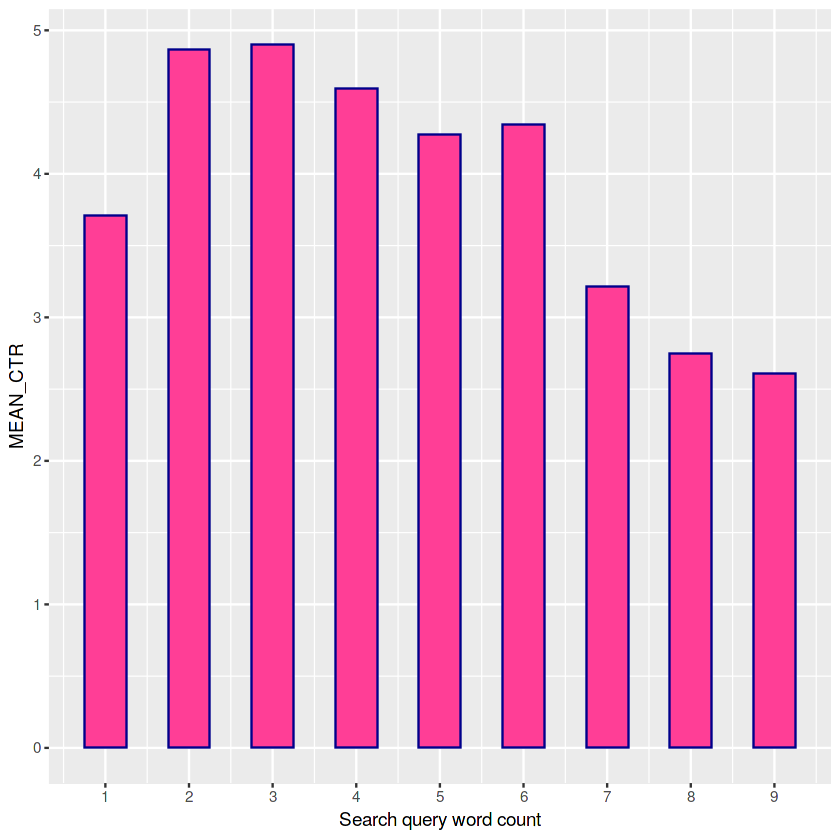

In [39]:
ggplot(result, aes(x=Qcount, y = MEAN_CTR)) + geom_bar(color="darkblue", fill = "violetred1", stat="identity", width = 0.5) + labs(x = "Search query word count") + scale_x_continuous(breaks = seq(0,10, by = 1))

> Conclusion: We observe that as the number of words in a search query increases, typically CTR of Ads displayed declines.

### 3.5.2 How does Ad Title word count affect Ad CTR 

In [40]:
temp <- acp_data %>% select(Tcount, CTR)
result <- temp %>% group_by(Tcount) %>% 
summarize(MEAN_CTR = mean(CTR))
result %>% head

Tcount,MEAN_CTR
<int>,<dbl>
1,5.188903
2,5.468239
3,4.382002
4,4.484546
5,4.361038
6,3.948253


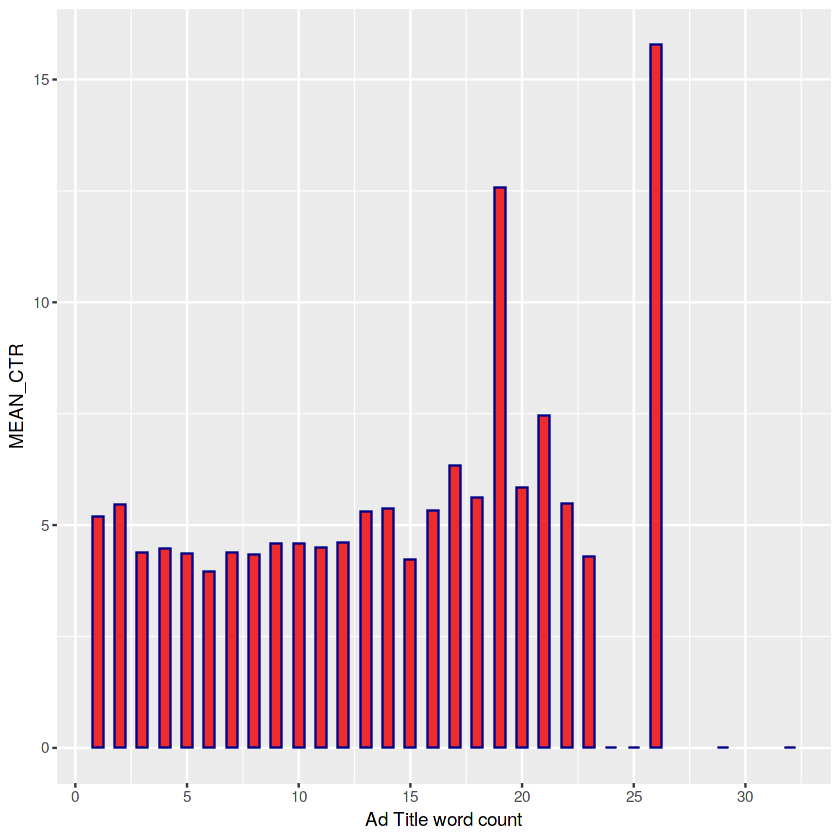

In [41]:
ggplot(result, aes(x=Tcount, y = MEAN_CTR)) + geom_bar(color="darkblue", fill = "firebrick2", stat="identity", width = 0.5) + labs(x = "Ad Title word count") + scale_x_continuous(breaks = seq(0,30, by = 5))

> Conclusion: We more or less identify a uniform distribution of Ad CTR with Ad Title word count.

### 3.5.3 How does Ad description word count affect Ad CTR

In [42]:
temp <- acp_data %>% select(Dcount, CTR)
result <- temp %>% group_by(Dcount) %>% 
summarize(MEAN_CTR = mean(CTR))
result %>% head

Dcount,MEAN_CTR
<int>,<dbl>
1,1.204819
2,2.987421
3,3.093812
4,6.115780
5,4.799375
6,4.772814


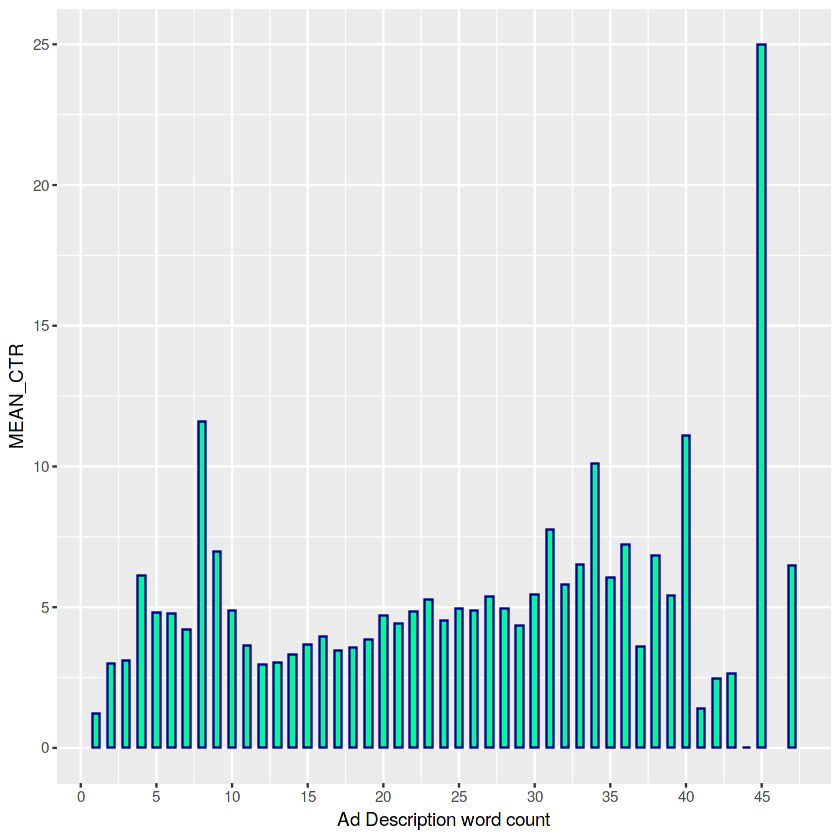

In [43]:
ggplot(result, aes(x=Dcount, y = MEAN_CTR)) + geom_bar(color="darkblue", fill = "mediumspringgreen", stat="identity", width = 0.5) + labs(x = "Ad Description word count") + scale_x_continuous(breaks = seq(0,50, by = 5))

> Conclusion: There's no apparent relationship that can be identified between Ad description word count and Ad CTR.

### 3.5.4 How does Ad Impressions affect Ad clicks? Does more impressions mean more clicks?

In [44]:
temp <- acp_data %>% select(AdId, Impression, Click)
result <- temp %>%
group_by(AdId) %>%
summarize(MEAN_IMP = mean(Impression),MEAN_CLI = mean(Click))
result %>% head

AdId,MEAN_IMP,MEAN_CLI
<dbl>,<dbl>,<dbl>
1000031,1.000000,0.0000000
1000467,2.315789,0.1052632
1000468,1.000000,0.0000000
1000469,1.000000,0.0000000
1000471,1.000000,0.0000000
1000473,2.000000,0.0000000


`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



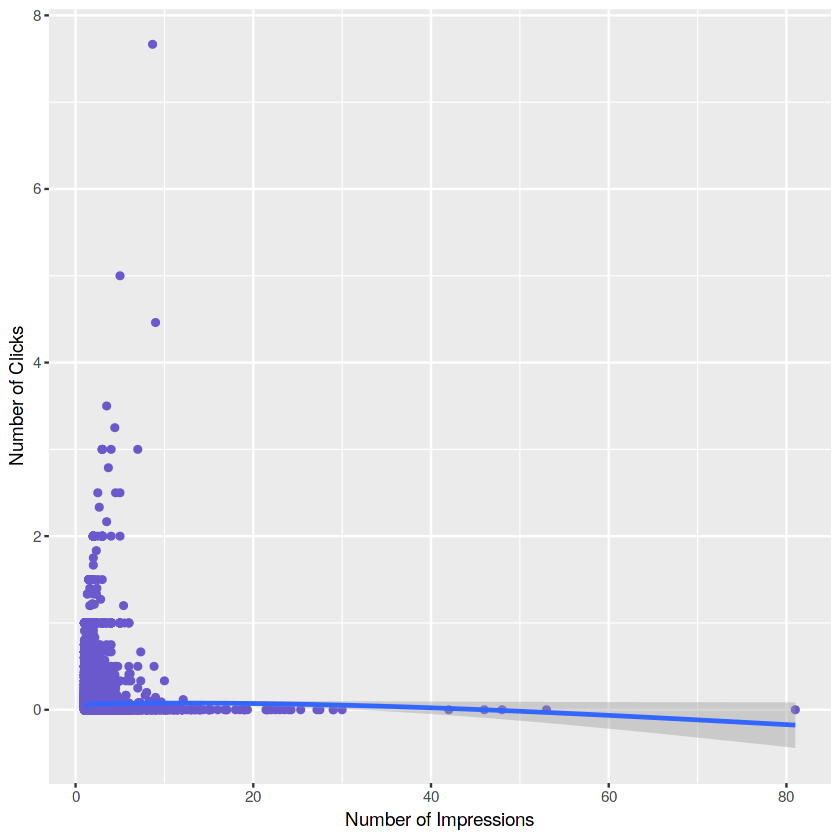

In [45]:
ggplot(result,aes(x=MEAN_IMP, y=MEAN_CLI)) + geom_point(color = "slateblue3") + geom_smooth() + labs(x="Number of Impressions", y = "Number of Clicks")

> Conclusion: As the number of impressions of an advertisement increases, number of clicks tend to be 0.
> This points out a very interesting aspect of human behaviour. If you see the same Ad multiple times, you'd be less inclined to click it.

### 3.5.5 How does Gender of a user affect Ad CTR?

In [46]:
temp <- acp_data %>% select(Gender, CTR)
result <- temp %>%
group_by(Gender) %>%
summarize(MEAN_CTR = mean(CTR))
result

Gender,MEAN_CTR
<dbl>,<dbl>
0,4.527559
1,4.409308
2,4.585996


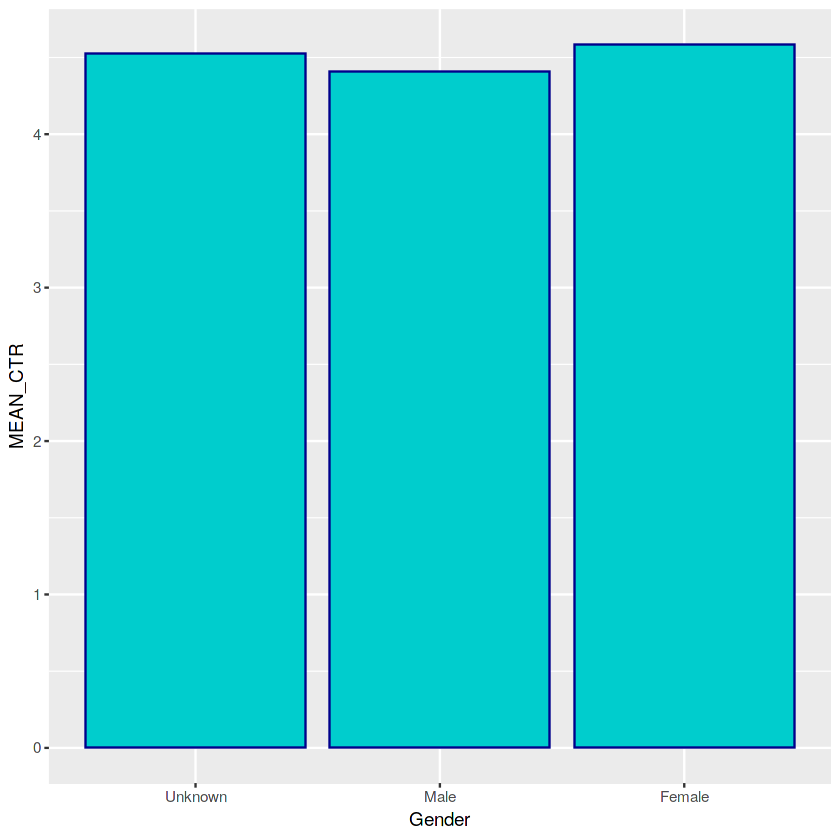

In [47]:
ggplot(result, aes(x=as.factor(Gender), y = MEAN_CTR)) + geom_bar(color="darkblue", fill = "cyan3", stat="identity") + scale_x_discrete("Gender", labels = c("0" = "Unknown", "1" = "Male", "2" = "Female"))

>Conclusion: It seems like Gender doesn't really impact Ad CTR

### 3.5.6 How does Age of a user affect Ad CTR?

In [48]:
temp <- acp_data %>% select(Age, CTR)
result <- temp %>%
group_by(Age) %>%
summarize(MEAN_CTR = mean(CTR))
result

Age,MEAN_CTR
<dbl>,<dbl>
1,4.457391
2,4.525747
3,4.384555
4,4.232053
5,4.746470
6,5.256566


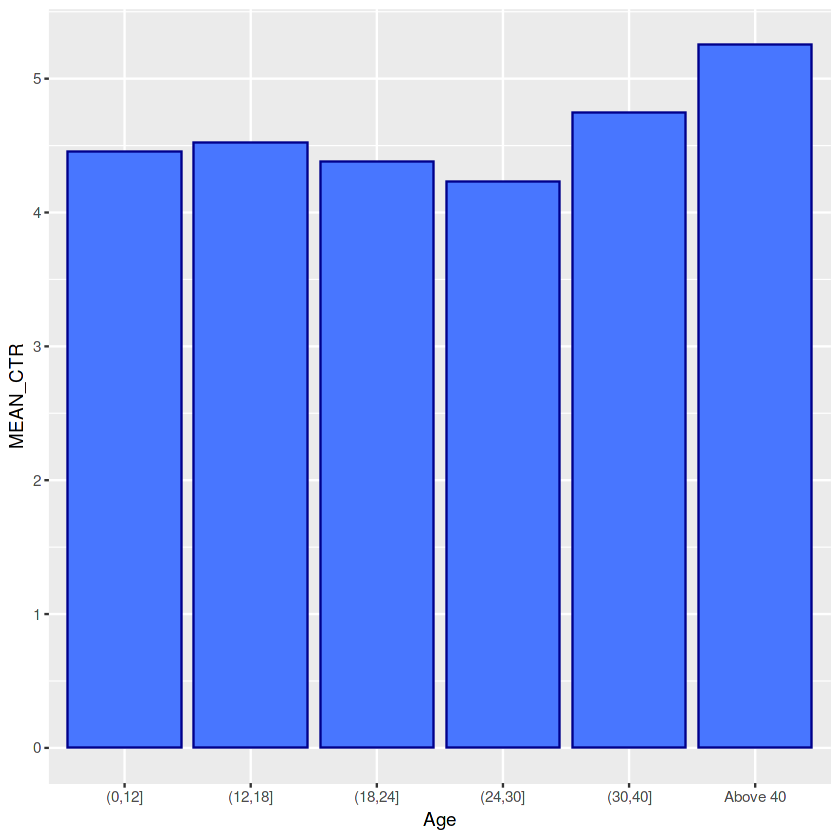

In [49]:
ggplot(result, aes(x=as.factor(Age), y = MEAN_CTR)) + geom_bar(color="darkblue", fill = "royalblue1", stat="identity") + scale_x_discrete("Age", labels = c("1" = "(0,12]", "2" = "(12,18]", "3" = "(18,24]", "4" = "(24,30]", "5" = "(30,40]", "6" = "Above 40"))

>Conclusion: We observe users with ages > 30 have higher Mean CTR as compared to younger users

#### Let's try to dig further to see how Gender plays a role in affecting Ad CTR for users above 30 years age

In [50]:
temp <- acp_data %>% select(Gender, Age, CTR)
temp <- temp %>%
filter(Age == 5 | Age == 6 ) 
temp %>% head

,Gender,Age,CTR
,<dbl>,<dbl>,<dbl>
1,1,5,0
2,1,6,0
3,1,6,0
4,2,5,0
5,1,6,0
6,2,5,0


In [51]:
num <- temp %>%
filter(Gender == 2) 
cat("Percent of Old female users", nrow(num)/nrow(acp_data) * 100, "%")

Percent of Old female users 9.328482 %

In [52]:
temp <- temp %>% select(Gender, CTR)
result <- temp %>%
group_by(Gender) %>%
summarize(MEAN_CTR = mean(CTR))
result

Gender,MEAN_CTR
<dbl>,<dbl>
0,4.277570
1,4.808067
2,5.025482


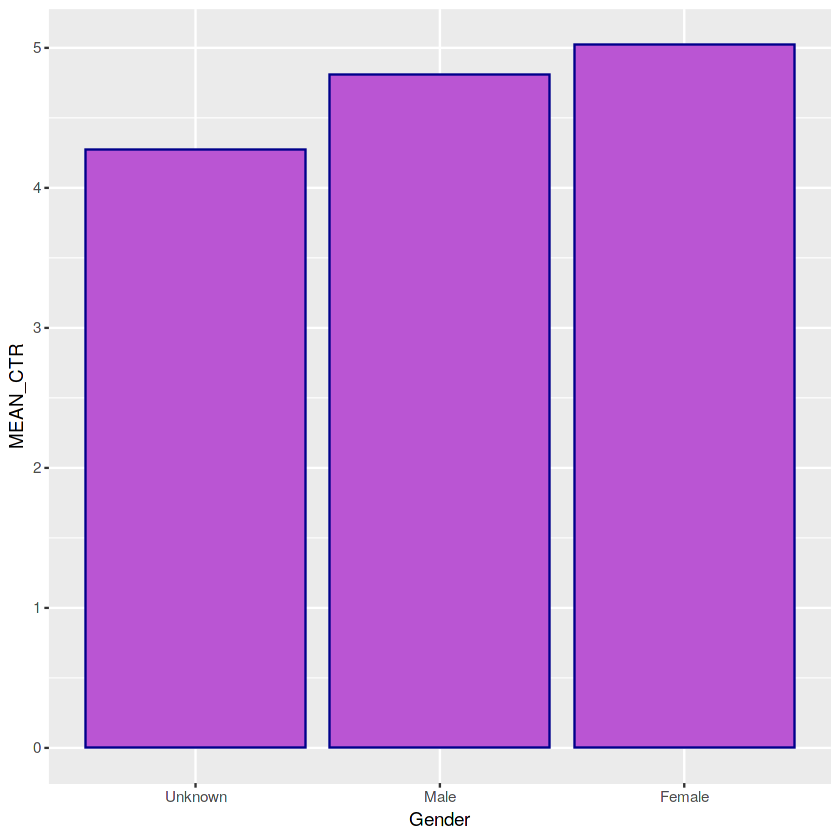

In [53]:
ggplot(result, aes(x=as.factor(Gender), y = MEAN_CTR)) + geom_bar(color="darkblue", fill = "mediumorchid", stat="identity") + scale_x_discrete("Gender", labels = c("0" = "Unknown", "1" = "Male", "2" = "Female"))

> Conclusion: We observe that as compared to their male counterparts, female users with above 30 years of age (categories 5 & 6) are more likely to click an Ad.

### 3.5.7 How does Ad position affect Ad CTR

In [54]:
temp <- acp_data %>% select(Pos, CTR)
result <- temp %>%
group_by(Pos) %>%
summarize(MEAN_CTR = mean(CTR), COUNT = n())
result %>% head

Pos,MEAN_CTR,COUNT
<dbl>,<dbl>,<int>
1,5.518009,3022771
2,3.077325,1597657
3,1.894403,331846


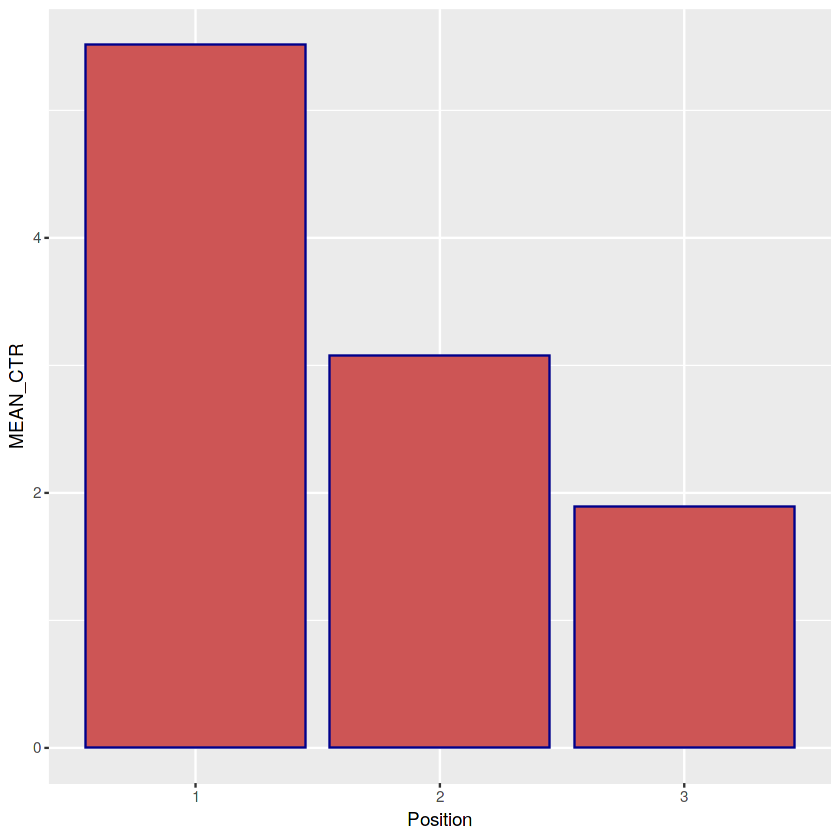

In [55]:
ggplot(result, aes(x=as.factor(Pos), y = MEAN_CTR)) + geom_bar(color="darkblue", fill = "indianred3", stat="identity") + scale_x_discrete("Position")

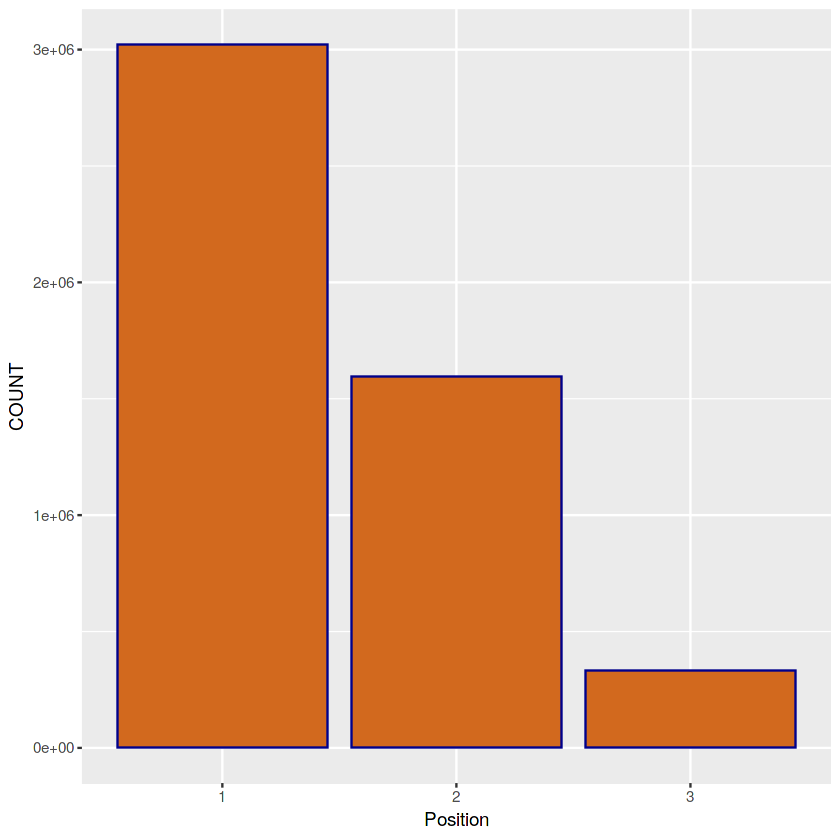

In [56]:
ggplot(result, aes(x=as.factor(Pos), y = COUNT)) + geom_bar(color="darkblue", fill = "chocolate", stat="identity") + scale_x_discrete("Position") + labs(x="Frequency of Ads")

>Conclusion: Clearly, We observe that the CTR for an advertisement which are more visible to the user (Ad placed on the top most slots) is higher as compared to CTR of an advertisement which are not directly visible. Typically, high performing Ads have lower position of 1 or 2.

### 3.5.8 How does the depth of a search session affect Ad CTR

In [57]:
temp <- acp_data %>% select(Depth, CTR)
result <- temp %>%
group_by(Depth) %>%
summarize(MEAN_CTR = mean(CTR), COUNT = n())
result %>% head

Depth,MEAN_CTR,COUNT
<dbl>,<dbl>,<int>
1,4.577864,1450766
2,4.799309,2514678
3,3.561618,986830


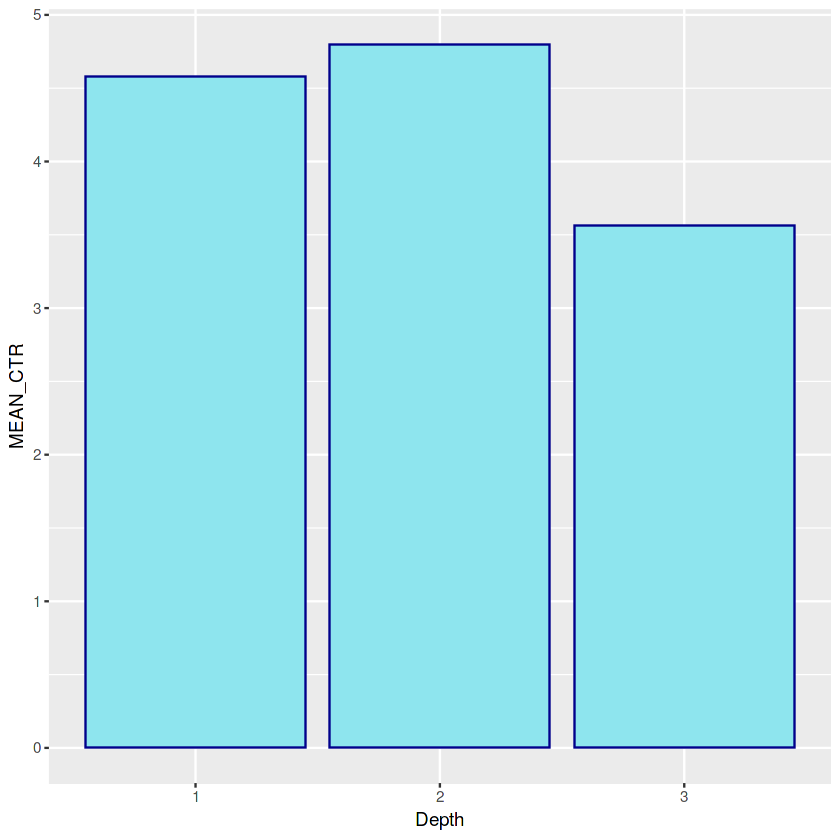

In [58]:
ggplot(result, aes(x=as.factor(Depth), y = MEAN_CTR)) + geom_bar(color="darkblue", fill = "cadetblue2", stat="identity") + scale_x_discrete("Depth")

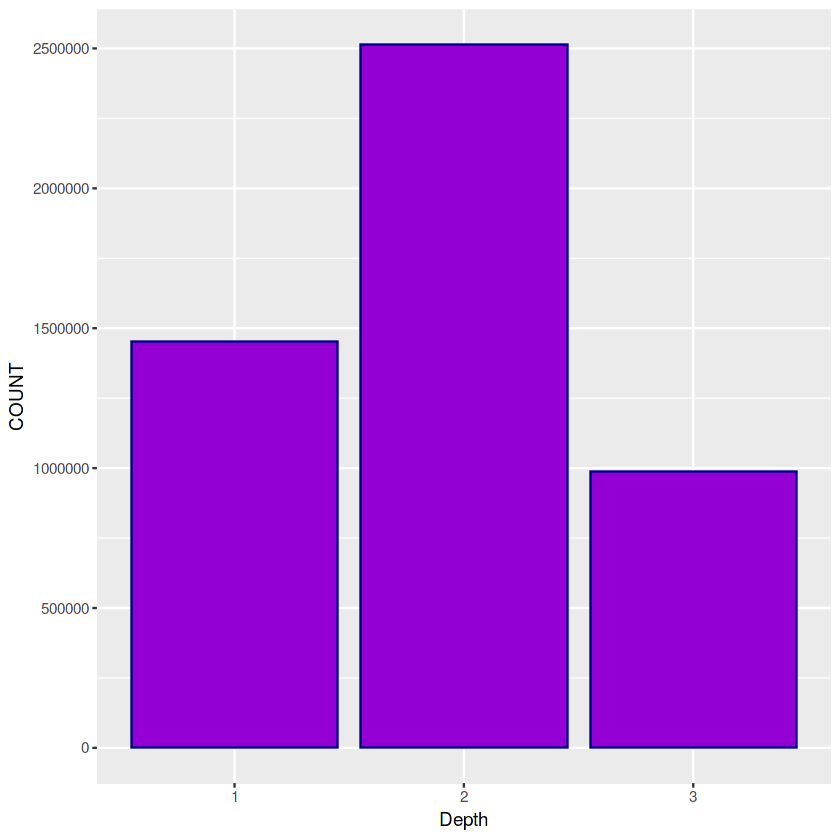

In [59]:
ggplot(result, aes(x=as.factor(Depth), y = COUNT)) + geom_bar(color="darkblue", fill = "darkviolet", stat="identity") + scale_x_discrete("Depth")

>Conclusion:
* The most common depth of a search session is 2 in the given data
* We also notice a trend that as the depth of the search session increases, Mean CTR tends to decrease.

## 3.6 Studying the role of Advertiser

### 3.6.1 Studying the role of the advertiser based on Ad CTR

#### 3.6.1.1 Intially, we begin by categorizing the data with respect to advertisers who have a high CTR on their Ads and those who don't. 
Then it allows us to study more about the advertisers with high CTR Ads and how their Ads differs from a advertiser with low CTR Ads.
For instance, it could be possible to know whether an advertiser with high CTR ads use more words in title, description to describe ads etc.

In [60]:
temp <- acp_data %>% select(AdvId, CTR, Dcount, Tcount)
result <- temp %>%
group_by(AdvId) %>%
summarize(MEAN_CTR = mean(CTR), MEAN_DCOUNT = mean(Dcount), MEAN_TCOUNT = mean(Tcount))
result %>% head

AdvId,MEAN_CTR,MEAN_DCOUNT,MEAN_TCOUNT
<dbl>,<dbl>,<dbl>,<dbl>
78,0.000000,2.00000,3.000000
80,0.000000,2.00000,3.000000
81,7.317073,26.00000,11.000000
82,3.693460,22.00000,5.000000
83,3.378378,17.78378,5.081081
85,4.651163,26.59302,10.174419


In [61]:
cat( 'Total number of unique advertisers: ',length(unique(temp$AdvId)) )

Total number of unique advertisers:  13921

#### 3.6.1.2 Now we get to the burning question:
How to decide whether an advertiser is high CTR advertiser?

Before we answer that, let's take a look at the Mean CTR corresponding to advertisers

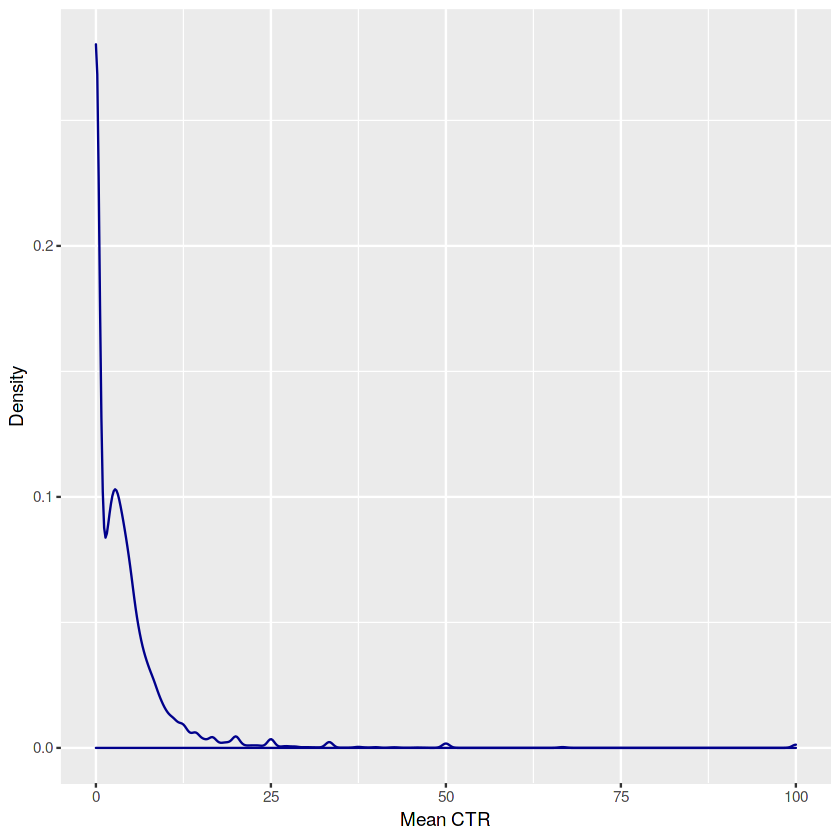

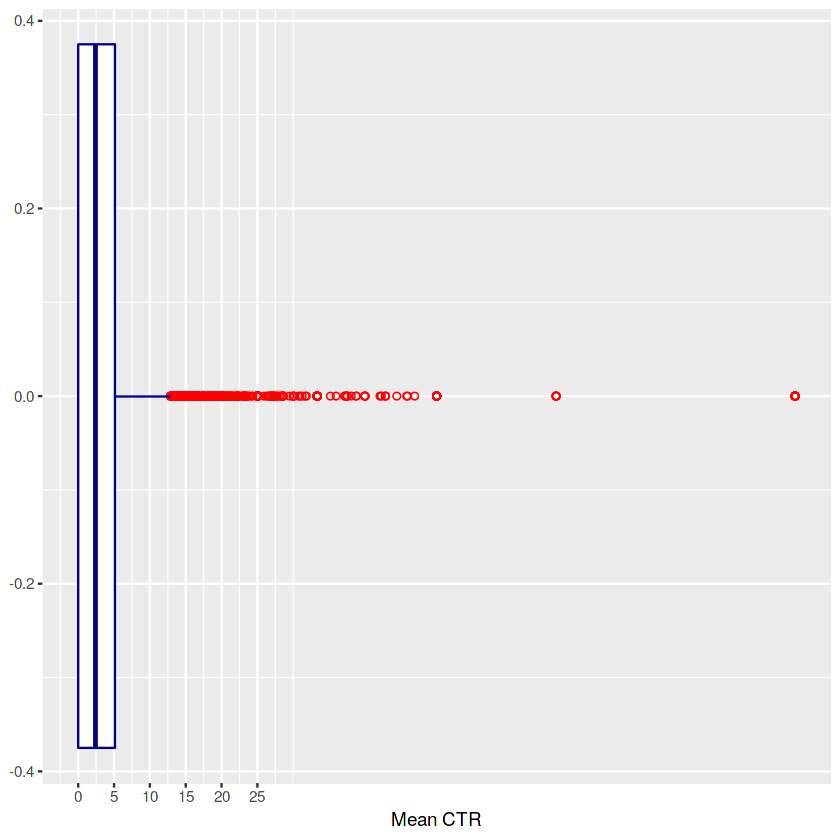

In [62]:
# Plot the distribution
ggplot(result, aes(x=MEAN_CTR)) + geom_density(color="darkblue") + scale_y_continuous(name="Density") + labs(x = "Mean CTR")
ggplot(result, aes(x=MEAN_CTR)) + geom_boxplot(color="darkblue",outlier.colour = "red", outlier.shape = 1) + scale_x_continuous(name="Mean CTR", breaks = seq(0,25, by = 5))

In [63]:
cat("Minimum MEAN CTR: ", min(result$MEAN_CTR), "\n")
cat("Maximum MEAN CTR: ", max(result$MEAN_CTR), "\n")
cat('Average MEAN CTR:', mean(result$MEAN_CTR), "\n")
cat('Median of MEAN CTR:', quantile(result$MEAN_CTR,  probs = c(0.5)), "\n")
cat('3rd Quantile of MEAN CTR:', quantile(result$MEAN_CTR,  probs = c(0.75)), "\n")
cat('95 percentile of MEAN CTR:', quantile(result$MEAN_CTR,  probs = c(0.95)), "\n")

Minimum MEAN CTR:  0 
Maximum MEAN CTR:  100 
Average MEAN CTR: 3.944974 
Median of MEAN CTR: 2.409639 
3rd Quantile of MEAN CTR: 5.128205 
95 percentile of MEAN CTR: 13.03318 


>We now choose to define all advertisers whose Mean CTR is above 3rd quantile (~5.13) as high CTR advertisers (could vary depending on the results)

In [64]:
result <- transform(result, HighCTR = MEAN_CTR > 5.128205)
result %>% head

,AdvId,MEAN_CTR,MEAN_DCOUNT,MEAN_TCOUNT,HighCTR
,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
1,78,0.000000,2.00000,3.000000,FALSE
2,80,0.000000,2.00000,3.000000,FALSE
3,81,7.317073,26.00000,11.000000,TRUE
4,82,3.693460,22.00000,5.000000,FALSE
5,83,3.378378,17.78378,5.081081,FALSE
6,85,4.651163,26.59302,10.174419,FALSE


In [65]:
result %>%
count(HighCTR)

HighCTR,n
<lgl>,<int>
FALSE,10437
TRUE,3484


>We observe that there are only 3464 Advertisers among the total of 13921 Advertisers who correspond to Ads with ad CTR > 5.13 %.

#### 3.6.1.3 Now that we have successfully seperated High CTR advertisers, let's now assess whether an advertiser with high CTR Ads uses more words to describe their Ads

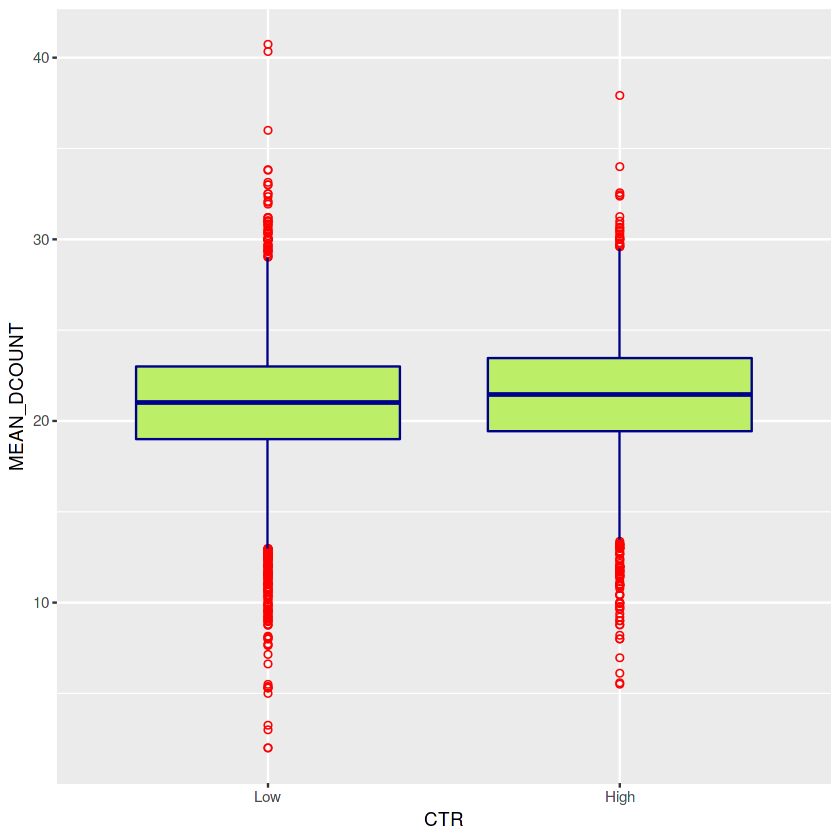

In [66]:
ggplot(result, aes(x=as.factor(HighCTR), y=MEAN_DCOUNT)) + geom_boxplot(fill = "darkolivegreen2", color="darkblue",outlier.colour = "red", outlier.shape = 1) + scale_x_discrete(name="CTR", labels = c("FALSE" = "Low", "TRUE" = "High"))

In [67]:
result %>%
select(HighCTR, MEAN_DCOUNT) %>%
group_by(HighCTR) %>%
summarize(MEDIAN_DCOUNT = median(MEAN_DCOUNT))

HighCTR,MEDIAN_DCOUNT
<lgl>,<dbl>
FALSE,21.02174
TRUE,21.47638


>Conclusion: We observe that although very subtle, the median Ad description word count for high CTR advertiser (21.476) is slightly more as compared to a low CTR advertiser(21.021).

#### 3.6.1.4 let's now find out whether an advertiser with high CTR Ads uses more words in their Ad title

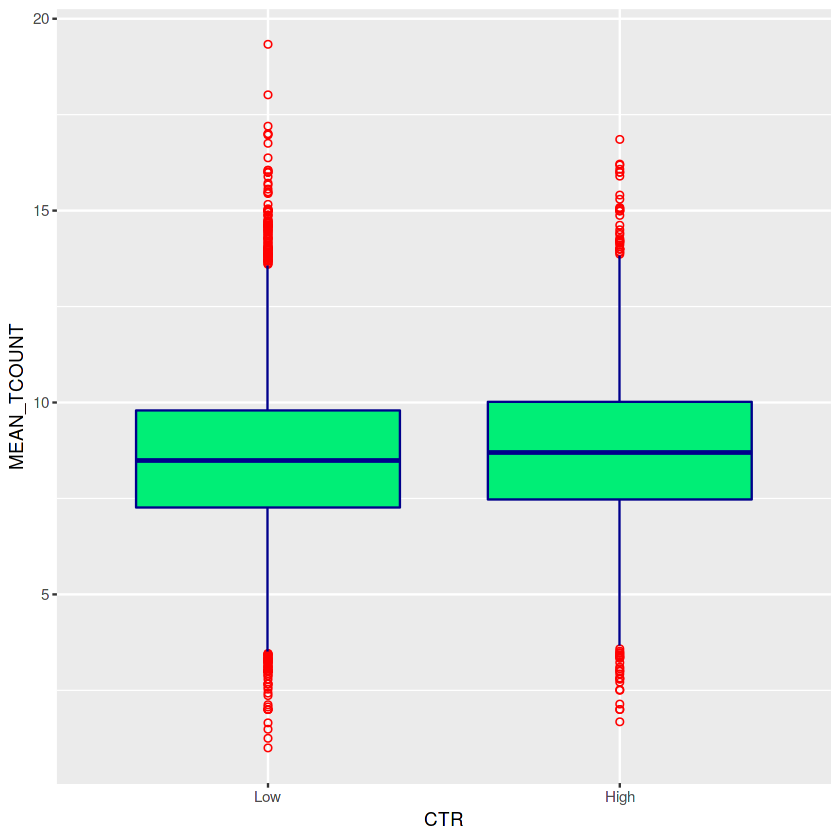

In [68]:
ggplot(result, aes(x=as.factor(HighCTR), y=MEAN_TCOUNT)) + geom_boxplot(fill = "springgreen2", color="darkblue",outlier.colour = "red", outlier.shape = 1) + scale_x_discrete(name="CTR", labels = c("FALSE" = "Low", "TRUE" = "High"))

In [69]:
result %>%
select(HighCTR, MEAN_TCOUNT) %>%
group_by(HighCTR) %>%
summarize(MEDIAN_TCOUNT = median(MEAN_TCOUNT))

HighCTR,MEDIAN_TCOUNT
<lgl>,<dbl>
FALSE,8.5
TRUE,8.7


>Conclusion: Again we observe that although very subtle, the median Ad title word count for high CTR advertiser (8.7) is slightly more as compared to a low CTR advertiser(8.5).

#### BIG Takeaways:
It is pretty intuitive to think that the advertisers regardless of whether they have High CTR or Low CTR ads use almost the same median word count in the title and description. Why?
Typically because of the way it works, each ad is given a limited display space irrespectiveo the Advertiser.
Have said that, what could be the reason for some advertisers to have High CTR.


There could various reasons we can think off that applied to the features when data was collected:

* Ads having High Quality content
* High demand of the product sold by an Advertiser.

#### 3.6.1.5 let's now try to find out whether an advertiser with high CTR Ads impress more of their ads to the users. That is to say that whether they are frequent advertisers or not.
By our intuition, they should be frequent but let's try to analyze what the data tells us.

In [70]:
temp <- acp_data %>%
select(AdvId, Impression)
result2 <- temp %>%
group_by(AdvId) %>%
summarize(IMP_SUM = sum(Impression), IMP_COUNT = n())
result2 %>% head
result <- transform(result, IMP_SUM = result2$IMP_SUM, IMP_COUNT = result2$IMP_COUNT )
result %>% head

AdvId,IMP_SUM,IMP_COUNT
<dbl>,<dbl>,<int>
78,1,1
80,1,1
81,98,82
82,5230,3651
83,63,37
85,91,86


,AdvId,MEAN_CTR,MEAN_DCOUNT,MEAN_TCOUNT,HighCTR,IMP_SUM,IMP_COUNT
,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<int>
1,78,0.000000,2.00000,3.000000,FALSE,1,1
2,80,0.000000,2.00000,3.000000,FALSE,1,1
3,81,7.317073,26.00000,11.000000,TRUE,98,82
4,82,3.693460,22.00000,5.000000,FALSE,5230,3651
5,83,3.378378,17.78378,5.081081,FALSE,63,37
6,85,4.651163,26.59302,10.174419,FALSE,91,86


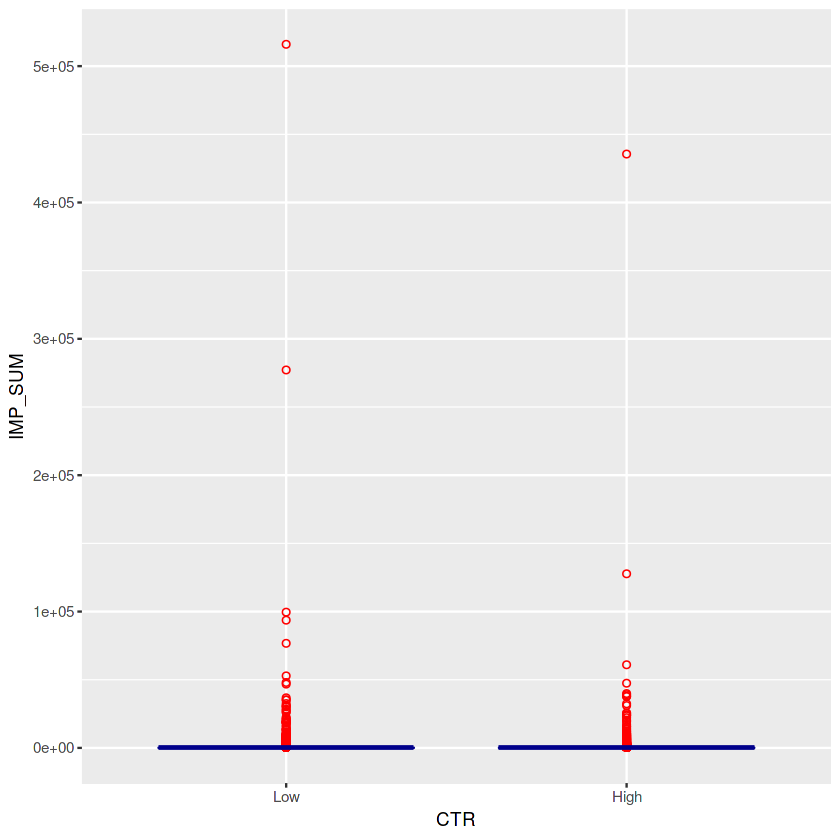

In [71]:
ggplot(result, aes(x=as.factor(HighCTR), y=IMP_SUM)) + geom_boxplot(fill = "springgreen2", color="darkblue",outlier.colour = "red", outlier.shape = 1) + scale_x_discrete(name="CTR", labels = c("FALSE" = "Low", "TRUE" = "High"))

In [72]:
result %>%
select(HighCTR, IMP_SUM) %>%
group_by(HighCTR) %>%
summarize(MEDIAN_IMP = median(IMP_SUM), MEAN_IMP = mean(IMP_SUM))

HighCTR,MEDIAN_IMP,MEAN_IMP
<lgl>,<dbl>,<dbl>
FALSE,53,381.3985
TRUE,49,586.8944


>Conclusion: 
A High CTR Advertiser has higher mean number of impressions(586.8) as opposed to a low CTR Advertiser (381.3). 
However the median number of impressions for a High CTR Advertiser is lower (49) as opposed to a low CTR Advertiser(53).

### 3.6.2 Studying the role of the advertiser based on Ad Frequency

We again begin by categorizing the data with respect to advertisers who have a high frequency with respect to publishing their Ads and those who don't.
This allows us to study how Ads by a frequent Advertiser differs from a infrequent Advertiser. For instance,  it could be possible to know whether a frequent advertiser uses more words in title, description to describe ads etc.

#### 3.6.2.1 Now we get to another burning question:
How to decide whether an advertiser is frequent or not?

The ways to tackle this are two fold:
* We can classify based on the Impressions 
* We can classify based on the count of occurrence in the data.

We begin by choosing to classify based on the advertiser impressions.
To start off, let's take a look at the sum of impressions for each advertiser and its overall distribution.

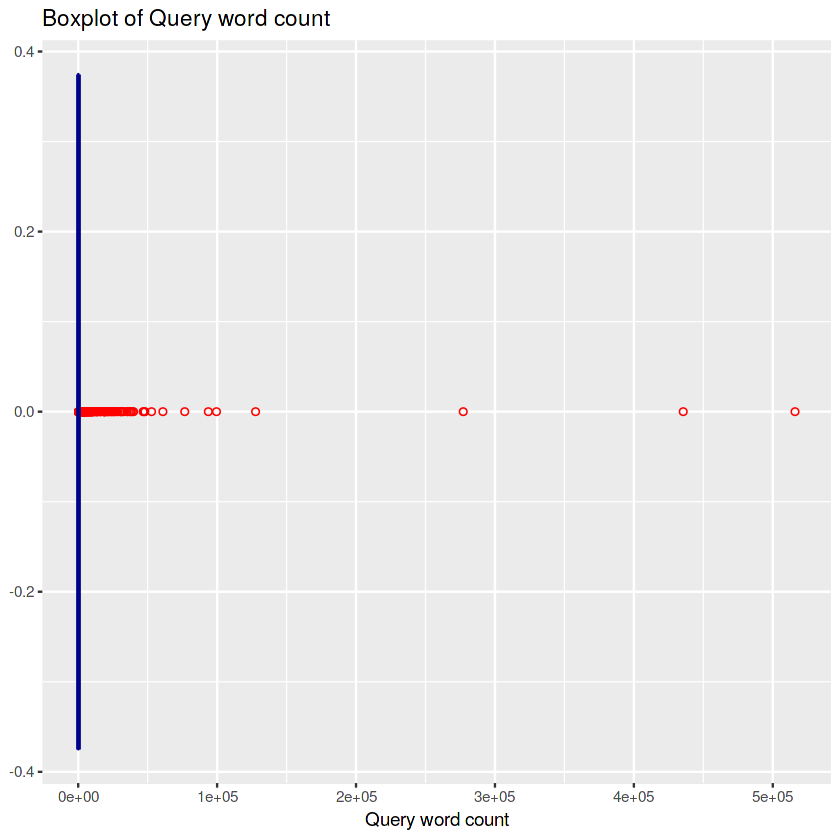

In [73]:
# Plot the distribution
ggplot(result, aes(x=IMP_SUM)) + geom_boxplot(color="darkblue",outlier.colour = "red", outlier.shape = 1) + scale_x_continuous(name="Query word count") + labs(title = "Boxplot of Query word count")

We see a lot of outliers. Let's try to find the quantiles to properly impose the dichotomy between frequent/infrequent advertisers.

In [74]:
cat("Minimum value of Impressions: ", min(result$IMP_SUM), "\n")
cat("Maximum value of Impressions: ", max(result$IMP_SUM), "\n")
cat('Mean value of Impressions:', mean(result$IMP_SUM), "\n")
cat('Median value of Impressions:', quantile(result$IMP_SUM,  probs = c(0.5)), "\n")
cat('3rd Quantile value of Impressions:', quantile(result$IMP_SUM,  probs = c(0.75)), "\n")
cat('95 percentile value of Impressions:', quantile(result$IMP_SUM,  probs = c(0.95)), "\n")

Minimum value of Impressions:  1 
Maximum value of Impressions:  516004 
Mean value of Impressions: 432.8278 
Median value of Impressions: 51 
3rd Quantile value of Impressions: 152 
95 percentile value of Impressions: 852 


#### Now, we can choose to define 'Frequent Advertiser' as an advertiser with number of Impressions greater than 3rd quantile value of Impressions (152).

In [75]:
result <- transform(result, ISFREQUENT = IMP_SUM > 152)
result %>% head

,AdvId,MEAN_CTR,MEAN_DCOUNT,MEAN_TCOUNT,HighCTR,IMP_SUM,IMP_COUNT,ISFREQUENT
,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<int>,<lgl>
1,78,0.000000,2.00000,3.000000,FALSE,1,1,FALSE
2,80,0.000000,2.00000,3.000000,FALSE,1,1,FALSE
3,81,7.317073,26.00000,11.000000,TRUE,98,82,FALSE
4,82,3.693460,22.00000,5.000000,FALSE,5230,3651,TRUE
5,83,3.378378,17.78378,5.081081,FALSE,63,37,FALSE
6,85,4.651163,26.59302,10.174419,FALSE,91,86,FALSE


Since we chose 3rd quantile as a point of division, the classes are expected to be imbalanced as shown below.

In [76]:
result %>%
count(ISFREQUENT)

ISFREQUENT,n
<lgl>,<int>
FALSE,10443
TRUE,3478


#### 3.6.2.2 Now that we have successfully seperated High frequent advertisers, let's now investigate whether a frequent advertiser has higher MEAN CTR

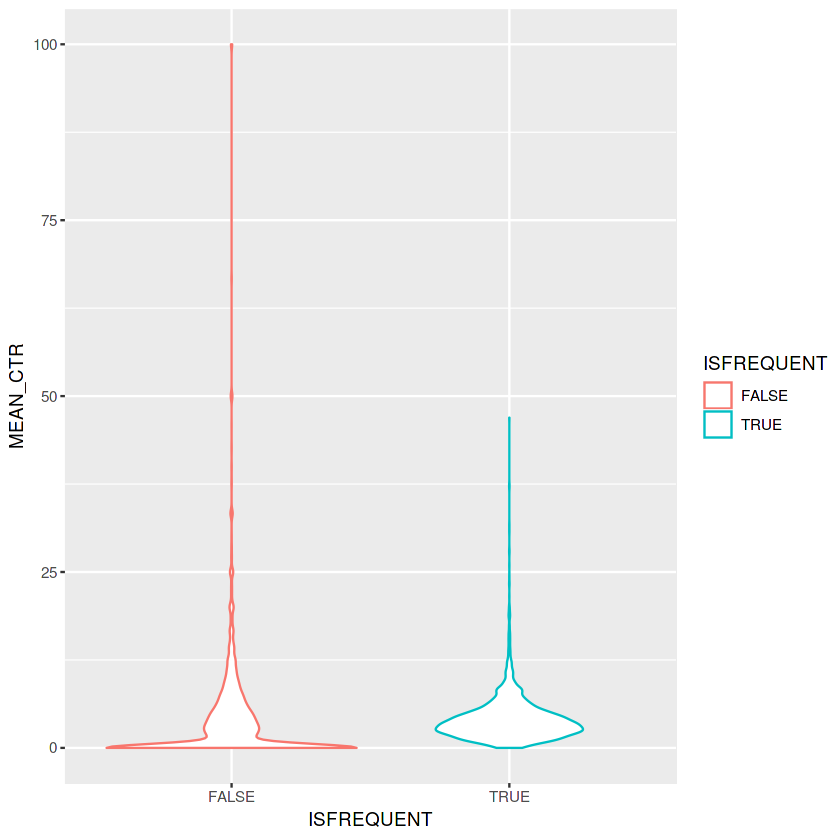

In [77]:
ggplot(result, aes(x=ISFREQUENT,y=MEAN_CTR,color=ISFREQUENT)) + geom_violin()

In [78]:
result %>%
select(ISFREQUENT, MEAN_CTR) %>%
group_by(ISFREQUENT) %>%
summarize(MEDIAN_CTR = median(MEAN_CTR), MEAN_CTR = mean(MEAN_CTR))

ISFREQUENT,MEDIAN_CTR,MEAN_CTR
<lgl>,<dbl>,<dbl>
FALSE,1.470588,3.910870
TRUE,3.421637,4.047375


>Conclusion: A frequent Advertiser has higher mean and median number of impressions as opposed to a infrequent Advertiser. The result is pretty intuitive because any advertiser being frequent tantamounts to higher average CTR else the advertiser wouldn't be frequent in the first place. If more impressions by a particular advertiser do not gain him any revenue, there's no reason for the advertiser to be frequent or even be publishing any ads. 

#### 3.6.2.3 Let's now investigate whether a frequent advertiser use more words to describe their Ads

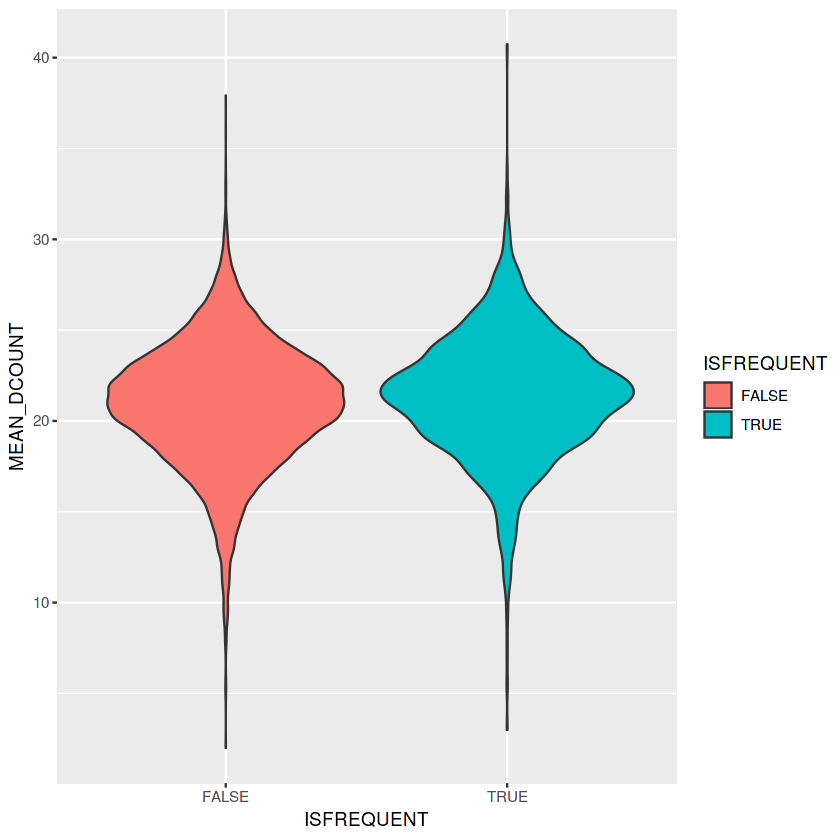

In [79]:
ggplot(result, aes(x=ISFREQUENT,y=MEAN_DCOUNT,fill=ISFREQUENT)) + geom_violin()

In [80]:
result %>%
select(ISFREQUENT, MEAN_DCOUNT) %>%
group_by(ISFREQUENT) %>%
summarize(MEDIAN_DCOUNT = median(MEAN_DCOUNT))

ISFREQUENT,MEDIAN_DCOUNT
<lgl>,<dbl>
FALSE,21.00000
TRUE,21.47097


>Conclusion: we observe that although very subtle, the median Ad description word count for frequent advertisers is slightly more as compared to infrequent advertisers.

#### 3.6.2.4 Let's now assess whether a frequent advertiser use more words to in Ad title

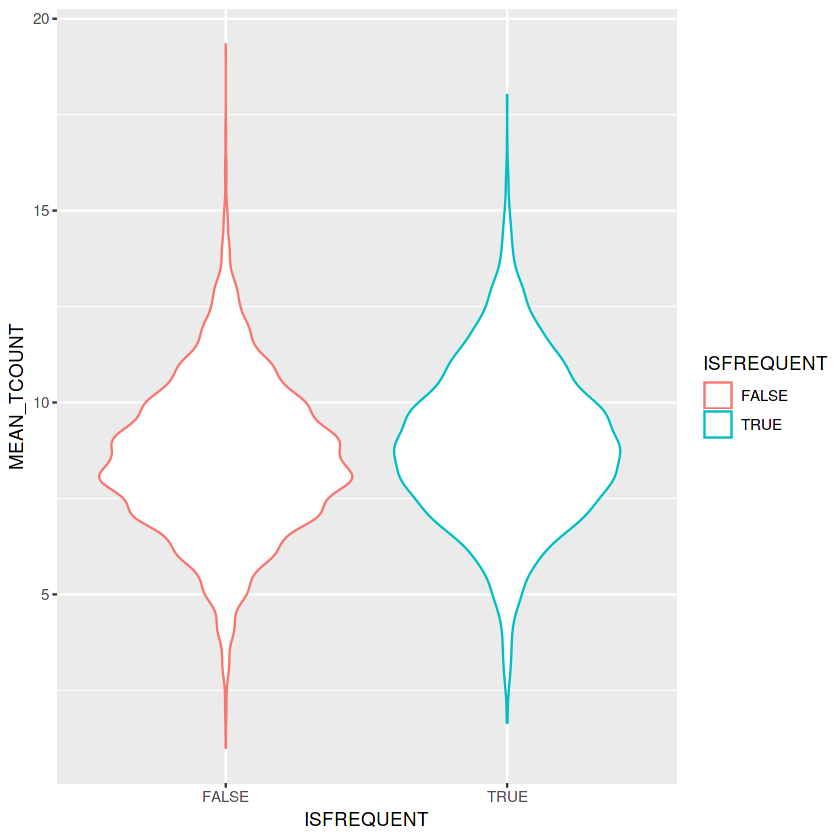

In [81]:
ggplot(result, aes(x=ISFREQUENT,y=MEAN_TCOUNT,color=ISFREQUENT)) + geom_violin()

In [82]:
result %>%
select(ISFREQUENT, MEAN_TCOUNT) %>%
group_by(ISFREQUENT) %>%
summarize(MEDIAN_TCOUNT = median(MEAN_TCOUNT))

ISFREQUENT,MEDIAN_TCOUNT
<lgl>,<dbl>
FALSE,8.444444
TRUE,8.827249


>Conclusion: we again observe that although very subtle, the median Ad title word count for frequent advertisers is slightly more as compared to infrequent advertisers.

## 3.7 Studying Advertisements without considering the effect of advertisers

### 3.7.1 Studying Advertisements based on Ad CTR

Intially, we begin by dividing the data with respect to Ads that have a high CTR and those that don't. 
Then it allows us to study more about the high CTR advertisements and how they differ from low CTR advertisements.

Goal: Study the properties of advertisements
We intend to answer the following questions:
* How does Ad Description word count vary with CTR of an Ad ?
* How does Ad Title word count vary with CTR of an Ad ? 
* How is the Ad frequency related to Ad description word count ?
* How is the Ad frequency related to Ad title word count? 
* How is the Ad frequency related to Ad Position ? 
* How is the Ad frequency related to Ad Depth ? 
* How is the Ad frequency related to Ad Clicks ? Does more Ad impressions mean more clicks ? 
* Finally, does frequency of an Ad has an effect on CTR of the Ad ? 

In [83]:
temp <- acp_data %>% select(AdId, CTR, Pos, Depth, Qcount, Dcount, Tcount)
temp %>% head

,AdId,CTR,Pos,Depth,Qcount,Dcount,Tcount
,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,20157587,0,3,3,1,14,6
2,20157628,0,3,3,1,19,6
3,21522776,0,1,3,1,17,8
4,21522776,0,1,3,1,17,10
5,21522776,0,1,3,1,17,10
6,21522776,0,2,2,1,12,9


In [84]:
result <- temp %>%
group_by(AdId) %>%
summarize(CTR = mean(CTR), Pos = mean(Pos), Depth = mean(Depth), Qcount = mean(Qcount), Dcount = mean(Dcount), Tcount = mean(Tcount))
result %>% head

AdId,CTR,Pos,Depth,Qcount,Dcount,Tcount
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1000031,0.000000,2.000000,2.000000,5.000000,18.00000,6
1000467,6.578947,1.947368,2.052632,2.421053,17.94737,5
1000468,0.000000,1.000000,2.000000,1.000000,17.00000,5
1000469,0.000000,2.000000,2.000000,2.000000,17.00000,5
1000471,0.000000,1.500000,1.750000,2.625000,17.87500,5
1000473,0.000000,2.000000,2.000000,3.000000,18.00000,5


In [85]:
temp1 <- acp_data %>% select(AdId, Impression, Click)
res1 <- temp1 %>%
group_by(AdId) %>%
summarize(Impression = sum(Impression), Click = sum(Click))
res1 %>% head

AdId,Impression,Click
<dbl>,<dbl>,<dbl>
1000031,1,0
1000467,44,2
1000468,1,0
1000469,1,0
1000471,8,0
1000473,2,0


In [86]:
result <- transform(result, Impression = res1$Impression, Click = res1$Click )
result %>% head

,AdId,CTR,Pos,Depth,Qcount,Dcount,Tcount,Impression,Click
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1000031,0.000000,2.000000,2.000000,5.000000,18.00000,6,1,0
2,1000467,6.578947,1.947368,2.052632,2.421053,17.94737,5,44,2
3,1000468,0.000000,1.000000,2.000000,1.000000,17.00000,5,1,0
4,1000469,0.000000,2.000000,2.000000,2.000000,17.00000,5,1,0
5,1000471,0.000000,1.500000,1.750000,2.625000,17.87500,5,8,0
6,1000473,0.000000,2.000000,2.000000,3.000000,18.00000,5,2,0


In [87]:
# Number of unique advertisements
cat("Number of unique advertisements:", length(unique(result$AdId)))

Number of unique advertisements: 212422

#### 3.7.1.1 Now we work on how to decide if an Ad qualifies as a high CTR Advertisment?
Before we answer it, let's look at the distribution of MEAN CTR of Ads.

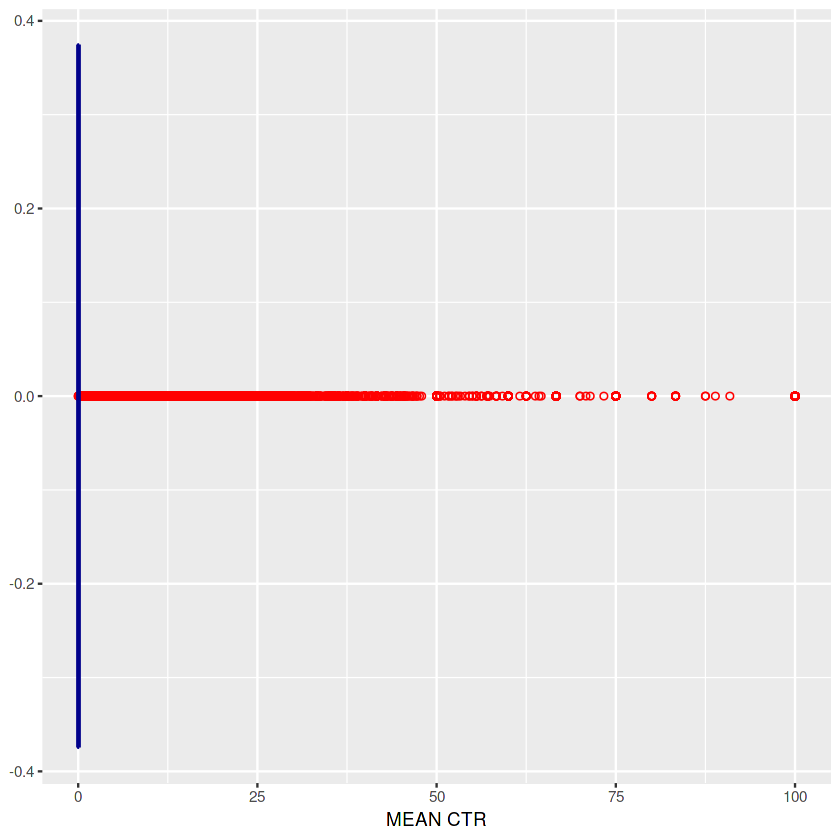

In [88]:
# Plot the distribution
ggplot(result, aes(x=CTR)) + geom_boxplot(color="darkblue",outlier.colour = "red", outlier.shape = 1) + scale_x_continuous(name="MEAN CTR")

In [89]:
cat("Minimum MEAN CTR: ", min(result$CTR), "\n")
cat("Maximum MEAN CTR: ", max(result$CTR), "\n")
cat('Average MEAN CTR:', mean(result$CTR), "\n")
cat('Median of MEAN CTR:', quantile(result$CTR,  probs = c(0.5)), "\n")
cat('3rd Quantile of MEAN CTR:', quantile(result$CTR,  probs = c(0.75)), "\n")
cat('95 percentile of MEAN CTR:', quantile(result$CTR,  probs = c(0.95)), "\n")

Minimum MEAN CTR:  0 
Maximum MEAN CTR:  100 
Average MEAN CTR: 5.013194 
Median of MEAN CTR: 0 
3rd Quantile of MEAN CTR: 0 
95 percentile of MEAN CTR: 33.33333 


#### 3.7.1.2 Does Ad CTR affect Ad title word count

#### 3.7.1.3 Does Ad CTR affect Ad description word count

#### 3.7.1.4 Do high CTR Ads have more number of impressions

### Part 3.7.2 Studying Ads based on Ad frequency